
"""
COSC2671 Social Media and Network Analytics(Assignment-2)
@author Salina Bharthu(s3736867), RMIT 2019

"""


In [1]:
# set jupyter notebook to print all output from a cell, not just the most recent one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#reloads modules
%load_ext autoreload
%autoreload 1
%aimport twitterClient
%aimport TwitterProcessing

In [3]:
#Import useful packages

import pandas as pd
import tweepy
import jsonpickle
import json
import codecs
import re
import nltk
import string

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import numpy as np
import math

from tweepy import Cursor
from tweepy import api
from twitterClient import twitterClient
from wordcloud import WordCloud

from argparse import ArgumentParser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from colorama import Fore, Back, Style
from collections import Counter

import matplotlib.pyplot as plt

client = twitterClient()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Salina\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Analysis of TimesNow news tweets

In [4]:
# Fetching tweets from Twitter
def get_save_tweets(filepath, api, name, max_tweets, lang='en'):

    tweetCount = 0

    #Open file and save tweets
    with open(filepath, 'w') as f:
        
        #fetch tweets  
        for tweet in Cursor(client.user_timeline, screen_name=name, lang= lang).items(max_tweets) :         
            if tweet.lang == 'en':
            #Convert to JSON format
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
                tweetCount += 1
        #Display how many tweets we have collected
        print("Downloaded tweets")
        


In [5]:
# Get 3000 TimesNow tweets
n1 = 3000
get_save_tweets('tweets_timesnow.json', client, '@TimesNow' , n1)


Downloaded tweets


In [6]:
#Function to pre-process tweet data
def process(text, tokeniser, stopwords=[]):
    """
    Perform the pre-processing of tweets.  

    @param text: the text (tweet) to process
    @param regexDigit: to exclude digits
    @param regexHttp: to exclude links
    @param emoji_pattern: to exclude emoji   
    @param tokeniser: tokeniser to use
    @param stopwords: list of stopwords to use
      
    @returns: list of (valid) tokens in text
    """
    
    regexDigit = re.compile("^\d+\s|\s\d+\s|\s\d+$")
    regexHttp = re.compile("^http")
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    
    text = text.lower()
    text = re.sub("@", '', text)
    text = re.sub("#", '', text)
    tokens = tokeniser.tokenize(text)
        
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit() and regexDigit.match(tok) == None and 
                           regexHttp.match(tok) == None and emoji_pattern.match(tok) == None ]

(-0.5, 399.5, 199.5, -0.5)

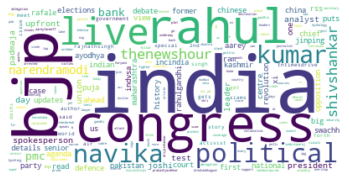

In [7]:
#Perform pre-processing and identify frequently occuring terms from tweets
fJsonName = 'tweets_timesnow.json'
tweetTokenizer = nltk.tokenize.TweetTokenizer()
termlist =[]
freqcount=[]
punct = list(string.punctuation)
#stopwords to remove
stopwordList = stopwords.words('english') + punct + ['tells', 'minister','new','timesnowsports', 'report', 'cm', 'pm', '1st', 'says', 'j', 'k', '–', '‘', 'breaking', 'exclusive','“', '”', 'people', 'times', '..', 'http','...', 'rt', '…', 'thi', '’', 'listen', 'watch']

# term frequency counter
termFreqCounter = Counter()
# number of most frequent terms to display
freqNum = 20

# store the list of tweets read from timeline
lTweets = []
ldates = []
dFreq = Counter()
ldfreq = []

with open(fJsonName, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tweetText = tweet.get('text', '')
        tweetdate = tweet.get('created_at')
        
        lTokens = process(text=tweetText, tokeniser=tweetTokenizer, stopwords=stopwordList)
        lTweets.append(' '.join(lTokens))
        # update count
        termFreqCounter.update(lTokens)
        ldates.append(tweetdate)
        dFreq.update(lTokens)
        ldfreq.append(dFreq)
        
    for term, count in termFreqCounter.most_common(freqNum):
        termlist.append(term)
        freqcount.append(count)      

#Making wordcloud of frequently occurring terms
wordcloud = WordCloud(background_color='white')
wordcloud.fit_words(frequencies=termFreqCounter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


## Analysis and comparison of two most popular political figures 

In [8]:
# Get NaMo tweets
n2= 5000
get_save_tweets('tweets_namo1.json', client , '@narendramodi', n2)

# Get Rahul tweets
get_save_tweets('tweets_rahul1.json', client , '@RahulGandhi', n2)

Downloaded tweets
Downloaded tweets


(-0.5, 399.5, 199.5, -0.5)

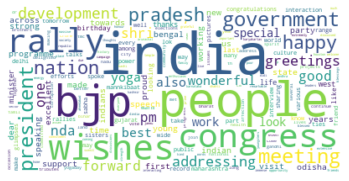

In [9]:
#Pre-process the tweets of Narendra Modi
fJsonName = 'tweets_namo1.json'
tweetTokenizer = nltk.tokenize.TweetTokenizer()
termlist =[]
freqcount=[]
punct = list(string.punctuation)
stopwordList = stopwords.words('english') + punct + ['narendramodi', 'great', 'day', 'always' ,'watch','ji', 'today', 'thank', '“', '”', 'would', 'https', '..', 'http','...', 'rt', '…', 'thi', '’', 'see']

# twitter client
client = twitterClient()
# term frequency counter
termFreqCounter = Counter()
# number of most frequent terms to display
freqNum = 20


# this will store the list of tweets read from timeline
lTweets = []
ldates = []
dFreq = Counter()
ldfreq = []

with open(fJsonName, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tweetText = tweet.get('text', '')
        tweetdate = tweet.get('created_at')
        lTokens = process(text=tweetText, tokeniser=tweetTokenizer, stopwords=stopwordList)
        lTweets.append(' '.join(lTokens))
        # update count
        termFreqCounter.update(lTokens)
        ldates.append(tweetdate)
        dFreq.update(lTokens)
        ldfreq.append(dFreq)
    for term, count in termFreqCounter.most_common(freqNum):
        termlist.append(term)
        freqcount.append(count)
        
#Making wordcloud of frequently occuring terms
wordcloud = WordCloud(background_color='white')
wordcloud.fit_words(frequencies=termFreqCounter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

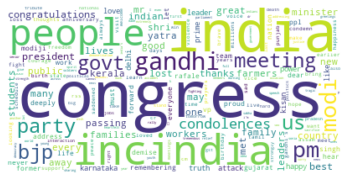

In [10]:
#Pre-process the tweets of Rahul Gnadhi
fJsonName = 'tweets_rahul1.json'
tweetTokenizer = nltk.tokenize.TweetTokenizer()
termlist =[]
freqcount=[]
punct = list(string.punctuation)
stopwordList = stopwords.words('english') + punct + ['rahul', 'today' ,'watch','ji', 'day', 'thank', '“', '”', 'wishes', 'https', '..', 'http','...', 'rt', '…', 'thi', '’', 'see']

# term frequency counter
termFreqCounter = Counter()
# number of most frequent terms to display
freqNum = 20

# this will store the list of tweets read from timeline
lTweets = []
ldates = []
dFreq = Counter()
ldfreq = []

with open(fJsonName, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tweetText = tweet.get('text', '')
        tweetdate = tweet.get('created_at')
        lTokens = process(text=tweetText, tokeniser=tweetTokenizer, stopwords=stopwordList)
        lTweets.append(' '.join(lTokens))
        # update count
        termFreqCounter.update(lTokens)
        ldates.append(tweetdate)
        dFreq.update(lTokens)
        ldfreq.append(dFreq)
    for term, count in termFreqCounter.most_common(freqNum):
        termlist.append(term)
        freqcount.append(count)  
        
#Making wordcloud of frequently occurring words
wordcloud = WordCloud(background_color='white')
wordcloud.fit_words(frequencies=termFreqCounter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
  

In [11]:
def getHashtags(tweet):
    """
    Extracts the associated hashtags of tweet.

    @param tweet: The tweet, which is in the tweepy json format.

    @returns: list of hashtags (in lower case)
    """
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags')
    #hashtags = entities.get('hashtags', [])

    return [tag['text'].lower() for tag in hashtags]

<Figure size 1080x720 with 0 Axes>

<BarContainer object of 15 artists>

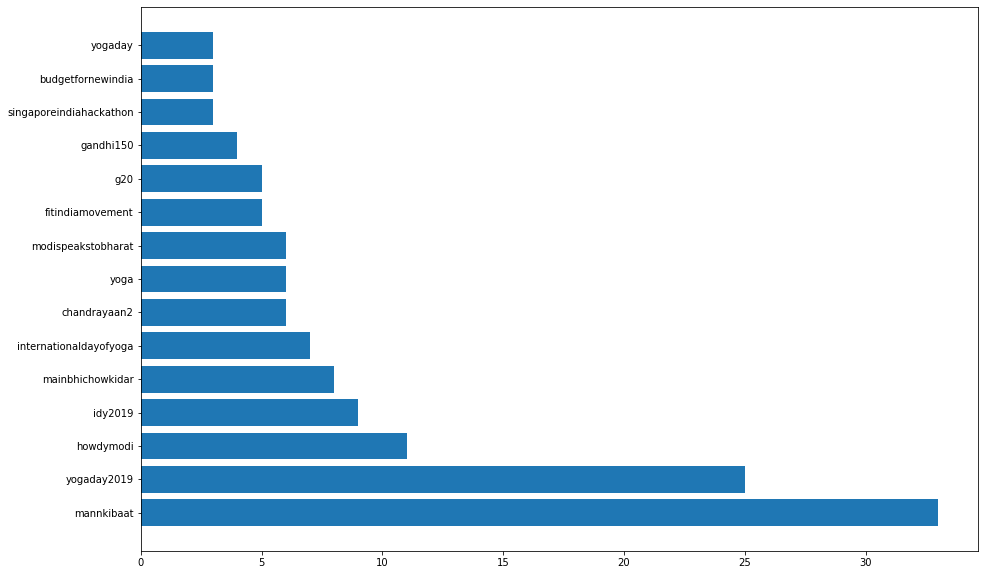

In [12]:
# fetch frequently occurring hashtags from Narendra Modi's tweets
fJsonName = 'tweets_namo1.json'
taglist=[]
freqcount=[]
ldates = []

# number of Hashtags to display
tweetThres = 15

# open file and use Counter to count the number of times the hash tags appears
with open(fJsonName, 'r') as f:
    hashtagsCounter = Counter()
    # for each line in file, load it, get the hashtags and insert them into the counter
    for line in f:
        tweet = json.loads(line)
        hashtagsInTweet = getHashtags(tweet)
        hashtagsCounter.update(hashtagsInTweet)
        dates = tweet.get('craeted_at')
        

    for tag, count in hashtagsCounter.most_common(tweetThres):
        taglist.append(tag)
        freqcount.append(count)
        #print(tag + ": " + str(count))

wordCount = pd.DataFrame(list(zip(taglist, freqcount)), index = list(range(0,len(taglist))))
wordCount.columns = ['taglist','freqcount']
        
# Create bar plot
plt.figure(figsize=(15,10))
plt.barh(wordCount['taglist'], wordCount['freqcount'])
plt.title=("Top Hashtags on user time line")
# Show graphic
plt.show() 


<Figure size 1080x720 with 0 Axes>

<BarContainer object of 15 artists>

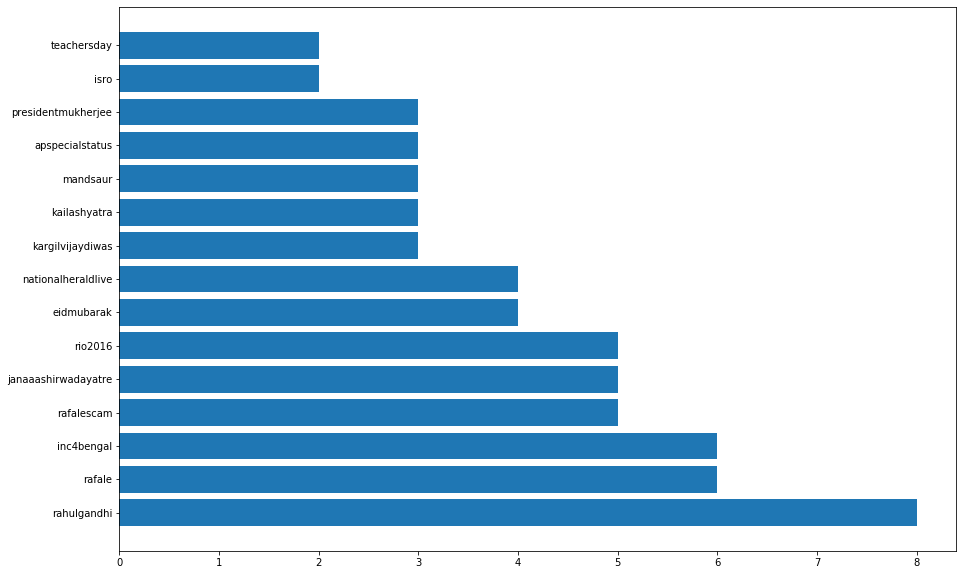

In [13]:
# fetch frequently occurring hashtags from Rahul Gandhi's tweets
fJsonName = 'tweets_rahul1.json'
taglist=[]
freqcount=[]
ldates = []

# number of tweets to display
tweetThres = 15

# open file and use Counter to count the number of times the hash tags appears
with open(fJsonName, 'r') as f:
    hashtagsCounter = Counter()
    # for each line in file, load it, get the hashtags and insert them into the counter
    for line in f:
        tweet = json.loads(line)
        hashtagsInTweet = getHashtags(tweet)
        hashtagsCounter.update(hashtagsInTweet)
        dates = tweet.get('craeted_at')
        

    for tag, count in hashtagsCounter.most_common(tweetThres):
        taglist.append(tag)
        freqcount.append(count)
        #print(tag + ": " + str(count))

wordCount = pd.DataFrame(list(zip(taglist, freqcount)), index = list(range(0,len(taglist))))
wordCount.columns = ['taglist','freqcount']
        

# Create bar plot
plt.figure(figsize=(15,10))
plt.barh(wordCount['taglist'], wordCount['freqcount'])
plt.lab = ("Top Hashtags on user time line")
plt.show() 


In [14]:
#Comparing Retweet frequency of both 

#Fetch retweet frequencies of NaMo's tweets
sTweetsFilenameNM = 'tweets_namo1.json'
ltweetsNM =[]
lretweetsNM =[]
ldatesNM =[]
    
with open(sTweetsFilenameNM, 'r') as f:
    for line in f:
        # each line is loaded according to json format, into tweet, which is actually a dictionary
        tweetNM = json.loads(line)
        hashtagsCounterNM = 0
        
        tweetTextNM = tweetNM.get('text', '')
        
        #Fetch retweet count
        retweetsNM = tweetNM.get('retweet_count')
        datesNM = tweetNM.get('created_at')
        
        lretweetsNM.append(retweetsNM)
        ldatesNM.append(pd.to_datetime(datesNM))

#create dataframe containing retweet frequency and dates
zipped_listNM = list(zip(ldatesNM, lretweetsNM))
retweet_df_namo = pd.DataFrame(zipped_listNM, columns= ('Dates','retweetFreq_NaMo'))
retweet_df_namo = retweet_df_namo[retweet_df_namo.retweetFreq_NaMo != 0]

# using date column as index
retweet_df_namo.set_index('Dates', inplace=True)

#create time series data by adding up sentiment scores
newSeries4 = retweet_df_namo.resample('1W', how='mean')

In [15]:
#Fetch retweet frequencies of Rahul's tweets
sTweetsFilename = 'tweets_rahul1.json'
ltweets =[]
lretweets =[]
ldates =[]
    
with open(sTweetsFilename, 'r') as f:
    for line in f:
        # each line is loaded according to json format, into tweet, which is actually a dictionary
        tweet = json.loads(line)
        hashtagsCounter = 0
        
        tweetText = tweet.get('text', '')
        
        #Fetch retweet count
        retweets = tweet.get('retweet_count')
        dates = tweet.get('created_at')
        
        lretweets.append(retweets)
        ldates.append(pd.to_datetime(dates))

#creating dataframe having retweet frequency and dates        
zipped_list = list(zip(ldates, lretweets))
retweet_df_rahul = pd.DataFrame(zipped_list, columns= ('Dates','retweetFreq_Rahul'))
retweet_df_rahul = retweet_df_rahul[retweet_df_rahul.retweetFreq_Rahul != 0]
retweet_df_rahul = retweet_df_rahul[retweet_df_rahul['Dates'] > '2018-11-01']

# using date column as index
retweet_df_rahul.set_index('Dates', inplace=True)

#create time series data by adding up sentiment scores
newSeries3 = retweet_df_rahul.resample('1W', how='mean')

Text(0.5, 0, 'Month')

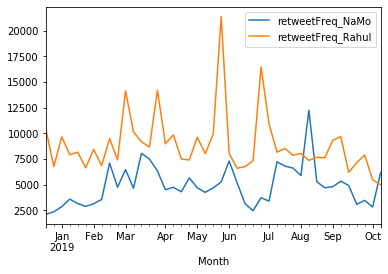

In [16]:
newSeries4['retweetFreq_Rahul'] = newSeries3['retweetFreq_Rahul']

# plots time series data of retweet frequency
newSeries4.plot()
plt.xlabel('Month')
#plt.title('Retweet Frequency of Naredra Modi and Rahul Gandhi')
plt.show()


## Plotting Location data

In [17]:
##### Fetching tweets from Twitter
def get_hashtag_tweets(filepath, api, query, max_tweets=5000, lang='en'):

    tweetCount = 0

    #Open file and save tweets
    with open(filepath, 'w') as f:
        
        #fetch tweets with # 
        for tweet in Cursor(client.search, q= query, lang='en').items(max_tweets) : 
            if tweet.lang == 'en':
            #Convert to JSON format
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
                tweetCount += 1
        #Display how many tweets we have collected
        print("Downloaded {0} tweets".format(tweetCount))
        
# Get those tweets
get_hashtag_tweets('tweets_namo_hashtag_5k.json', client,'#narendramodi')

Downloaded 5000 tweets
Downloaded 556 tweets


In [26]:
get_hashtag_tweets('tweets_rahul_hashtag_5k.json', client, '#RahulGandhi')

Downloaded 565 tweets


In [18]:
#plot bar chart of top n regions 
def RegionFreq(locsCount):

    loclist = []
    locFreqCount = []
    regionCount = 0
   
    for loc, count in locationFreqCounter.most_common(locsCount):
        regionCount += 1
        #fetch location
        loclist.append(loc)
        locFreqCount.append(count)
    
    #create data frame containing location and frequency
    wordCount = pd.DataFrame(list(zip(loclist, locFreqCount)), index = list(range(0,len(loclist))))
    wordCount.columns = ['loclist','locFreqCount']

    #plot bar chart
    plt.figure(figsize=(15,5))
    count_y = np.arange(len(wordCount['loclist']))
    plt.bar(count_y,wordCount['locFreqCount'])
    plt.xticks(count_y, wordCount['loclist'], rotation='60')
    #plt.title("Frequency of tweets from most common Locations")
    plt.xlabel("Location")
    plt.ylabel("Frequency")
    plt.show()

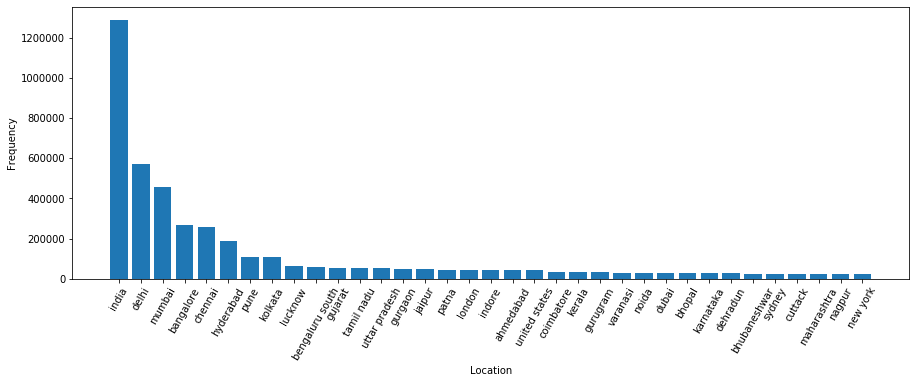

In [19]:

sfilename= 'tweets_namo_hashtag_5k.json'
ltweetloc =[]
ldates=[]
regions=[]
locationFreqCounter=Counter()


#
with open(sfilename, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        user = tweet.get('user', {})
        loc = user.get('location') #Extracts the associated location of tweet.
        reg = str.lower(loc).split(',')[0]
        #remove irrelavant data
        if reg not in ['', 'earth', 'online', 'mostly on the road', 'everywhere at once','nowhere']:
            try:
                if reg == 'new delhi': 
                    regions.append('delhi')
                elif reg in ['bharat ','bharat', 'hindustan', 'india ', ' india']:
                    regions.append('india')
                elif reg == 'bengaluru':
                    regions.append('bangalore')
                elif reg == 'navi mumbai':
                    regions.append('mumbai')
                elif reg == 'ahmadabad city':
                    regions.append('ahmedabad')
                else:
                    regions.append(reg.encode(encoding='utf-8').decode('ascii'))
            except UnicodeDecodeError:
                continue 
                
        # update count
        locationFreqCounter.update(regions)
    
RegionFreq(35)

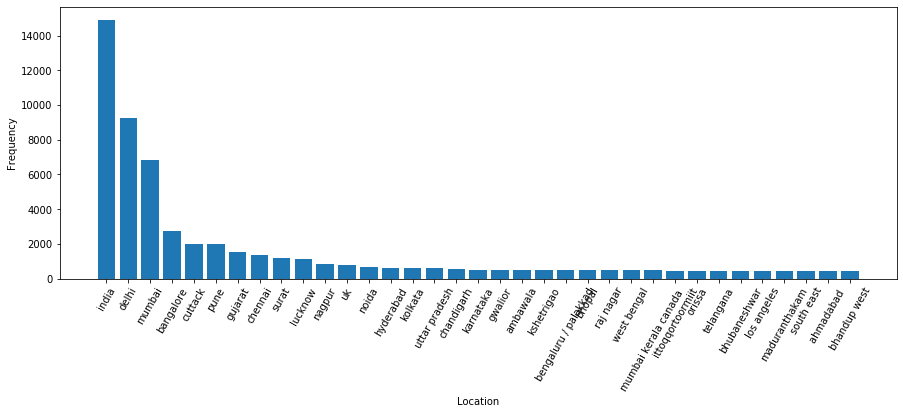

In [20]:

sfilename= 'tweets_rahul_hashtag_5k.json'
ltweetloc =[]
ldates=[]
regions=[]
locationFreqCounter=Counter()

with open(sfilename, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        user = tweet.get('user', {})
        loc = user.get('location') #Extracts the associated location of tweet.
        reg = str.lower(loc).split(',')[0]
        #remove irrelavant data
        if reg not in ['', 'earth', 'online', 'mostly on the road', 'everywhere at once ','nowhere']:
            try:
                if reg == 'new delhi':
                    regions.append('delhi')
                elif reg in ['bharat ','bharat', 'hindustan', 'india ', ' india']:
                    regions.append('india')
                elif reg in ['bengaluru', 'bengaluru south']:
                    regions.append('bangalore')
                else:
                    regions.append(reg.encode(encoding='utf-8').decode('ascii'))
            except UnicodeDecodeError:
                continue        
                
        # update count
        locationFreqCounter.update(regions) 

RegionFreq(35)

## Sentiment analysis of Narendra Modi and Rahul Gandhi

In [21]:
def vaderSentimentAnalysis(sTweetsFilename, bPrint, tweetProcessor):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param sTweetsFilename: name of input file containing a json formated tweet dump
    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param tweetProcessor: TweetProcessing object, used to pre-process each tweet.

    @returns: list of tweets, in the format of [date, sentiment]
    """

    # vader sentiment analyser
    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    poscount = 0
    negcount = 0
    # open file and process tweets, one by one
    with open(sTweetsFilename, 'r') as f:
        for line in f:
            # each line is loaded according to json format, into tweet, which is actually a dictionary
            tweet = json.loads(line)

            try:
                tweetText = tweet.get('text', '')
                tweetDate = tweet.get('created_at')
                # pre-process the tweet text
                lTokens = tweetProcessor.process(tweetText)

                # computes the sentiment scores
                dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

                # save the date and sentiment of each tweet
                lSentiment.append([pd.to_datetime(tweetDate), dSentimentScores['compound']])

                # print the tokens then the sentiment scores
                if bPrint:
                    print(*lTokens, sep =', ')
                    for cat,score in dSentimentScores.items():
                        print('{0}: {1}, '.format(cat, score), end='')
                        
                    print()
                    

            except KeyError as e:
                pass


    return lSentiment



In [22]:
#sentiment analysis of NaMo's tweets
tweetsFile = 'tweets_namo1.json'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True

# construct the tweet pro-processing object
tweetTokenizer = TweetTokenizer()
lPunct = list(string.punctuation)
# standard 'English' stopwords removal
lStopwords = stopwords.words('english') + lPunct + ['day' ,'ji', 'today', '“', '”', 'would', 'https', '..', 'http','...', 'rt', '…', 'thi', '’', 'see']

# call the TwitterProcessing python script
tweetProcessor = TwitterProcessing.TwitterProcessing(tweetTokenizer, lStopwords)

# compute the sentiment
lSentiment = []
lSentiment = vaderSentimentAnalysis(tweetsFile, flagPrint, tweetProcessor)

since, yesterday, ,, many, of, you, have, been, asking, -, what, is, it, that, i, was, carrying, in, my, hands, when, i, went, plogging, at
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
will, be, campaigning, in, maharashtra, tomorrow, ., looking, forward, to, addressing, rallies, in, jalgaon, and, sakoli, ., the, nda, i
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i, also, like, to, express, my, gratitude, to, all, political, parties, and, socio-cultural, organisations, of, tamil, nadu, f
neg: 0.0, neu: 0.605, pos: 0.395, compound: 0.8176, 
a, special, thank, you, to, my, sisters, and, brothers, of, tamil, nadu, ., as, always, ,, their, warmth, and, hospitality, was, outstandi
neg: 0.0, neu: 0.661, pos: 0.339, compound: 0.802, 
i, thank, president, xi, jinping, for, coming, to, india, for, our, second, informal, summit, ., the, #chennaiconnect, will, add, great
neg: 0.0, neu: 0.708, pos: 0.292, compound: 0.765, 
discussions, continued, with, president, xi, jinping, at, mamallapuram, 

neg: 0.0, neu: 0.763, pos: 0.237, compound: 0.4767, 
dr, ., hl, trivedi, was, a, stalwart, of, the, medical, world, ., he, made, a, mark, as, an, excellent, doctor, ,, known, for, his, dexterity
neg: 0.0, neu: 0.837, pos: 0.163, compound: 0.5719, 
thank, you, mata, @amritanandamayi, ji, ., your, inspiring, words, and, support, will, add, immense, strength, to, the, swachh, bhar
neg: 0.0, neu: 0.556, pos: 0.444, compound: 0.8807, 
a, great, mix, of, music, and, message, ,, song, and, swachhata, ., creative, and, humorous, ,, @indiatoday, .
neg: 0.0, neu: 0.51, pos: 0.49, compound: 0.8625, 
great, !
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.6588, 
excellent, tribute, to, bapu, ., happy, to, youngsters, participate, .
neg: 0.0, neu: 0.448, pos: 0.552, compound: 0.8126, 
way, to, go, !
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
great, to, this, enthusiasm, !
neg: 0.0, neu: 0.215, pos: 0.785, compound: 0.807, 
let, this, become, a, mass, movement, across, the, world, ., #plogforswachhbha

a, tribute, to, mahatma, gandhi, from, the, @un, !
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do, watch, !
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
great, meeting, with, @potus, @realdonaldtrump, in, new, york, ., we, had, extensive, deliberations, on, a, wide, range, of, subject
neg: 0.0, neu: 0.796, pos: 0.204, compound: 0.6249, 
happy, to, have, met, pm, @giuseppeconteit, ., we, discussed, strengthening, existing, areas, of, cooperation, and, exploring, newer
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7845, 
met, @unicefchief, ms, ., henrietta, fore, in, new, york, ., talked, about, the, steps, being, taken, by, the, government, of, india, towa
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
had, a, productive, meeting, with, president, hage, geingob, of, namibia, ., we, spoke, about, expanding, bilateral, cooperation, in
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
delighted, to, meet, @tamimbinhamad, ,, the, amir, of, qatar, ., we, had, productive, talks, on, deepening, bi

my, sincere, regards, to, you, and, your, organization, ,, rashesh, shah, ji, .
neg: 0.0, neu: 0.787, pos: 0.213, compound: 0.4019, 
thank, you, nyonishi, cousins, for, your, warm, wishes, ,, your, infectious, creativity, &, great, affection, ., my, best, wishes, !
neg: 0.0, neu: 0.265, pos: 0.735, compound: 0.9647, 
i, am, grateful, for, your, warm, wishes, ,, @urstrulymahesh, .
neg: 0.0, neu: 0.381, pos: 0.619, compound: 0.6705, 
thank, you, very, much, ,, @akshaykumar, !
neg: 0.0, neu: 0.589, pos: 0.411, compound: 0.4199, 
what, drives, me, is, working, for, youngsters, who, will, make, the, india, of, tomorrow, ., when, those, little, ones, reply, with, lov
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
india, s, determined, and, aspirational, youth, are, making, it, a, sporting, super, power, ., encouraging, them, and, working, for, th
neg: 0.0, neu: 0.591, pos: 0.409, compound: 0.8658, 
thanks, a, lot, for, your, wishes, ., keep, on, inspiring, more, youngsters, to, take, up, spor

this, morning, in, bengaluru, i, met, the, bright, @vikramsampath, ., i, am, glad, that, he, has, devoted, significant, time, and, resea
neg: 0.0, neu: 0.574, pos: 0.426, compound: 0.8555, 
as, important, as, the, final, result, is, the, journey, and, the, effort, ., our, effort, and, journey, to, the, moon, was, worth, it, .
neg: 0.0, neu: 0.844, pos: 0.156, compound: 0.4019, 
dear, scientists, ,, you, ventured, where, no, one, previously, went, ., india, is, proud, of, each, and, every, one, of, you, .
neg: 0.092, neu: 0.669, pos: 0.238, compound: 0.5423, 
addressing, a, public, meeting, in, the, dynamic, city, of, mumbai, .
neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.3818, 
addressing, our, hardworking, space, scientists, ., watch, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
at, 8, am, this, morning, ,, i, be, interacting, with, our, hardworking, space, scientists, at, the, isro, centre, in, bengaluru, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
india, is, proud, of, our, 

i, humbly, accept, the, king, hamad, order, of, the, renaissance, ., this, is, a, recognition, of, india, s, strong, friendship, with, ba
neg: 0.0, neu: 0.63, pos: 0.37, compound: 0.8316, 
my, friend, arun, jaitley, loved, india, ,, loved, his, party, and, loved, being, among, people, ., it, is, upsetting, and, unbelievabl
neg: 0.092, neu: 0.386, pos: 0.522, compound: 0.9382, 
that, was, a, rapturous, welcome, ., thank, you, bahrain, 🇧, 🇭, !
neg: 0.0, neu: 0.32, pos: 0.68, compound: 0.8172, 
addressing, a, huge, community, programme, in, bahrain, ., watch, .
neg: 0.0, neu: 0.723, pos: 0.277, compound: 0.3182, 
honoured, to, have, met, hh, prince, khalifa, bin, salman, al, khalifa, ,, prime, minister, of, the, kingdom, of, bahrain, ., our, talks, w
neg: 0.0, neu: 0.856, pos: 0.144, compound: 0.4939, 
landed, in, bahrain, ., this, visit, is, historical, and, will, improve, ties, between, our, nations, ., i, look, forward, to, meeting, th
neg: 0.0, neu: 0.861, pos: 0.139, compound: 0.4404

tribute, to, sushma, swaraj, ji, ,, an, excellent, leader, who, diligently, served, india, .
neg: 0.0, neu: 0.748, pos: 0.252, compound: 0.5719, 
@anupampkher, there, is, a, lot, we, learn, from, each, other, ,, knowingly, and, unknowingly, ., the, process, of, educating, oneself, n
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
today, ,, on, his, birth, anniversary, ,, we, remember, the, exemplary, dr, ., vikram, sarabhai, ., his, contribution, to, indian, science
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what, better, than, the, lush, green, jungles, of, india, ,, in, the, midst, of, mother, nature, to, throw, light, on, environmental, con
neg: 0.0, neu: 0.873, pos: 0.127, compound: 0.4404, 
spoke, to, @economictimes, on, a, wide, range, of, issues, relating, to, the, economy, ., elaborated, on, the, vision, of, making, india
neg: 0.0, neu: 0.9, pos: 0.1, compound: 0.25, 
my, best, wishes, on, the, occasion, of, eid, al-adha, ., i, hope, it, furthers, the, spirit, of, peace, and, 

a, commitment, fulfilled, ,, that, too, well, in, advance, !, it, was, decided, to, work, towards, doubling, the, tiger, population, by
neg: 0.0, neu: 0.658, pos: 0.342, compound: 0.7777, 
releasing, the, results, of, all, india, tiger, estimation, ., #internationaltigerday
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
today, ,, on, #internationaltigerday, ,, the, all, india, tiger, estimation, 2018, will, be, released, ., the, government, of, india, i
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my, dear, young, friends, ,, know, more, about, an, interesting, quiz, ,, which, can, take, you, to, sriharikota, to, witness, the, landi
neg: 0.0, neu: 0.662, pos: 0.338, compound: 0.8255, 
exceptional, warriors, ,, great, champions, !, here, is, why, the, accomplishments, of, these, children, will, make, every, indian, p
neg: 0.0, neu: 0.642, pos: 0.358, compound: 0.8313, 
better, bonding, through, reading, !, impressed, by, the, diverse, range, of, books, being, talked, about, by, people, 

neg: 0.0, neu: 0.75, pos: 0.25, compound: 0.7184, 
at, varanasi, airport, ,, unveiled, a, statue, of, one, of, mother, india, s, greatest, sons, ,, lal, bahadur, shastri, ji, ., shastri, ji
neg: 0.0, neu: 0.802, pos: 0.198, compound: 0.6369, 
jaipur, is, a, city, associated, with, culture, and, valour, ., elegant, and, energetic, ,, jaipur, s, hospitality, draws, people, from
neg: 0.0, neu: 0.7, pos: 0.3, compound: 0.7184, 
in, varanasi, ., speaking, on, various, important, issues, ., watch, .
neg: 0.0, neu: 0.795, pos: 0.205, compound: 0.2023, 
at, around, 11:30, this, morning, ,, i, will, address, the, programme, in, varanasi, marking, the, launch, of, @bjp4india, s, membershi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tomorrow, afternoon, in, varanasi, ,, i, will, visit, the, virtual, museum, at, man, mahal, ., situated, near, the, iconic, dashashwamed
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
on, the, jayanti, of, our, inspiration, ,, dr, ., syama, prasad, mookerjee, ,, the,

happy, to, have, met, president, @jairbolsonaro, of, brazil, ., india, and, brazil, are, cooperating, extensively, and, working, toge
neg: 0.0, neu: 0.812, pos: 0.188, compound: 0.5719, 
excellent, meeting, with, president, @jokowi, ,, where, we, reviewed, all, aspects, of, india-indonesia, ties, ., looking, forward
neg: 0.0, neu: 0.791, pos: 0.209, compound: 0.5719, 
friendly, nations, ,, futuristic, outcomes, ., the, ric, (, russia-india-china, ), meeting, was, an, excellent, forum, to, discuss, way
neg: 0.0, neu: 0.653, pos: 0.347, compound: 0.7845, 
with, #g20, leaders, during, the, summit, in, osaka, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
had, detailed, discussions, with, chancellor, merkel, ., there, is, immense, scope, for, even, stronger, relations, with, germany
neg: 0.0, neu: 0.852, pos: 0.148, compound: 0.3818, 
it, is, always, special, to, meet, my, good, friend, ,, president, moon, jae-in, ., he, is, extremely, passionate, about, furthering, fri
neg: 0.0, neu: 0.5

yoga, for, peace, ,, harmony, and, progress, !, watch, #yogaday2019, programme, from, ranchi, .
neg: 0.0, neu: 0.463, pos: 0.537, compound: 0.8516, 
here, are, some, more, photos, from, the, gathering, of, mps, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wonderful, evening, with, mp, colleagues, over, dinner, ., cutting, across, party, lines, ,, we, had, great, conversations, through
neg: 0.062, neu: 0.5, pos: 0.438, compound: 0.875, 
dear, @sdhawan25, ,, no, doubt, the, pitch, will, miss, you, but, i, hope, you, recover, at, the, earliest, so, that, you, can, once, again
neg: 0.17, neu: 0.623, pos: 0.207, compound: 0.4588, 
rashtrapati, ji, s, address, to, parliament, was, both, inspirational, and, aspirational, ., it, covered, several, aspects, ,, includi
neg: 0.0, neu: 0.809, pos: 0.191, compound: 0.5106, 
presidents, of, various, parties, had, extensive, discussions, on, :, improving, parliament, productivity, ., one, country, ,, one, e
neg: 0.0, neu: 0.686, pos: 0.314, compoun

neg: 0.0, neu: 0.64, pos: 0.36, compound: 0.8402, 
the, @mvpeoplesmajlis, is, not, merely, brick, and, mortar, ., it, represents, the, hopes, and, aspirations, of, the, people, of, mald
neg: 0.0, neu: 0.865, pos: 0.135, compound: 0.4215, 
do, you, practice, padahastasana, ?, if, not, ,, know, more, about, it, and, the, numerous, advantages, of, this, asana, ., #yogaday2019
neg: 0.0, neu: 0.872, pos: 0.128, compound: 0.3612, 
humbled, to, receive, the, most, honourable, order, of, the, distinguished, rule, of, nishan, izzuddeen, ., i, dedicate, this, award
neg: 0.0, neu: 0.666, pos: 0.334, compound: 0.8185, 
happy, to, have, met, you, ,, vice, president, @faisalnasym, ., our, talks, will, add, strength, to, ties, between, india, and, the, repu
neg: 0.0, neu: 0.723, pos: 0.277, compound: 0.7845, 
i, thank, members, of, the, @mvpeoplesmajlis, for, being, a, part, of, today's, programme, ., my, speech, covered, aspects, of, bilat
neg: 0.0, neu: 0.865, pos: 0.135, compound: 0.3612, 
former,

at, the, nda, meeting, in, central, hall, ., watch, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
thank, you, @hhshkmohd, for, the, greetings, ., look, forward, to, further, strengthening, of, entire, gamut, our, bilateral, relati
neg: 0.0, neu: 0.622, pos: 0.378, compound: 0.8176, 
thank, you, president, @macky_sall, for, your, warm, wishes, and, greetings, ., i, look, forward, to, working, closely, with, you, to, f
neg: 0.0, neu: 0.614, pos: 0.386, compound: 0.7783, 
thank, you, @ravishastriofc, .
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.3612, 
thank, you, @imvkohli, ., wishing, you, and, the, team, the, very, best, for, the, upcoming, world, cup, .
neg: 0.0, neu: 0.594, pos: 0.406, compound: 0.8357, 
humbled, the, affection, ,, @anupampkher, ., please, thank, your, mother, for, the, blessings, and, confidence, she, has, placed, in, us
neg: 0.0, neu: 0.464, pos: 0.536, compound: 0.9325, 
thank, you, @madhuridixit, ., our, efforts, to, transform, lives, and, make, india, more, 

dr, ., murli, manohar, joshi, is, a, scholar, and, intellectual, par, excellence, ., his, contribution, towards, improving, indian, edu
neg: 0.0, neu: 0.56, pos: 0.44, compound: 0.8807, 
called, on, respected, advani, ji, ., the, bjp, s, successes, today, are, possible, because, greats, like, him, spent, decades, buildin
neg: 0.0, neu: 0.62, pos: 0.38, compound: 0.8481, 
thank, you, @capt_amarinder, ji, for, the, wishes, ., i, congratulate, you, for, your, party's, performance, in, punjab, ., looking, f
neg: 0.0, neu: 0.64, pos: 0.36, compound: 0.743, 
thank, you, thiru, @mkstalin, for, the, good, wishes, ., i, also, take, this, opportunity, to, congratulate, you, and, your, party, fo
neg: 0.0, neu: 0.446, pos: 0.554, compound: 0.9343, 
thank, you, @omarabdullah, ., congratulations, to, your, party, for, the, impressive, performance, in, kashmir, .
neg: 0.0, neu: 0.421, pos: 0.579, compound: 0.9081, 
thank, you, @rahulgandhi, for, your, good, wishes, .
neg: 0.0, neu: 0.364, pos: 0.636,

new, ministry, for, tribal, welfare, ., creation, of, states, where, tribal, communities, have, a, bigger, say, in, decision, making
neg: 0.0, neu: 0.884, pos: 0.116, compound: 0.2732, 
after, six, phases, of, voting, ,, congress, is, aware, that, a, big, defeat, is, certain, ., now, ,, congress, is, looking, for, people, to
neg: 0.13, neu: 0.779, pos: 0.091, compound: -0.2263, 
tmc, is, anti-development, and, anti-democracy, ., bengal, will, vote, bjp, ., watch, my, speech, in, basirhat, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
happy, to, be, in, deoghar, ,, a, land, of, spirituality, and, divinity, ., watch, my, address, .
neg: 0.0, neu: 0.598, pos: 0.402, compound: 0.8126, 
the, mantra, of, ‘, sabka, saath, ,, sabka, vikas, has, struck, a, chord, with, people, of, paliganj, ., watch, my, speech, .
neg: 0.111, neu: 0.889, pos: 0.0, compound: -0.25, 
the, campaign, takes, me, eastwards, today, ., happy, to, be, in, paliganj, (, bihar, ), ,, deoghar, (, jharkhand, ), ,, basirhat

greetings, on, national, technology, day, !, we, remember, with, immense, pride, the, accomplishment, of, our, scientists, on, this, d
neg: 0.0, neu: 0.732, pos: 0.268, compound: 0.6696, 
sharing, some, glimpses, from, the, rally, in, hoshiarpur, ., the, august, presence, of, respected, badal, sahab, made, the, rally, eve
neg: 0.0, neu: 0.742, pos: 0.258, compound: 0.7096, 
being, in, himachal, pradesh, is, a, delight, ., my, mind, goes, back, to, the, time, i, spent, in, the, state, working, for, the, bjp, or
neg: 0.0, neu: 0.843, pos: 0.157, compound: 0.5994, 
punjab, is, angry, at, the, statements, of, congress, leaders, ., they, ll, vote, bjp-akali, dal, ., live, from, hoshiarpur, .
neg: 0.171, neu: 0.829, pos: 0.0, compound: -0.5106, 
in, haryana, ,, congress, brought, a, very, poor, culture, of, corruption, and, favouritism, in, governance, matters, ., the, bjp, gov
neg: 0.174, neu: 0.77, pos: 0.056, compound: -0.5095, 
rousing, response, in, rohtak, !, happy, to, several, farmer

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
kashmir, to, kanyakumari, ,, jamnagar, to, silchar, you, enjoy, reading, this, article, on, the, extent, and, diversity, of, my
neg: 0.0, neu: 0.842, pos: 0.158, compound: 0.4939, 
my, second, rally, in, rajasthan, ., here, is, my, speech, in, sikar, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
in, rajasthan, ,, the, land, of, courage, and, bravery, ., speaking, in, hindaun, ., watch, .
neg: 0.0, neu: 0.61, pos: 0.39, compound: 0.7506, 
on, his, birthday, ,, i, convey, my, greetings, to, rajasthan, cm, shri, @ashokgehlot51, ji, ., praying, for, his, good, health, and, long, life, .
neg: 0.0, neu: 0.675, pos: 0.325, compound: 0.802, 
looking, forward, to, visiting, rajasthan, today, ., will, be, campaigning, in, hindaun, ,, sikar, and, bikaner, ., in, order, to, gauge
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
greetings, to, union, minister, @umasribharti, ji, on, her, birthday, ., a, prolific, orator, and, dedicated, leader, ,, uma, j

here, is, the, reality, of, the, tmc, model, of, ‘, development, ., warning, -, it, is, corrupt, ,, violent, and, regressive, .
neg: 0.296, neu: 0.704, pos: 0.0, compound: -0.743, 
amazing, asansol, !, i, thank, all, those, who, came, to, bless, us, during, the, rally, today, .
neg: 0.0, neu: 0.539, pos: 0.461, compound: 0.8553, 
those, born, in, the, 21st, century, ,, our, first, time, voters, have, only, seen, bjd, misrule, ., a, vote, for, bjp, in, odisha, is, a, v
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
here, are, pictures, from, the, campaign, in, kendrapara, and, balasore, ,, odisha, ., after, leaving, matters, of, administration, to
neg: 0.0, neu: 0.936, pos: 0.064, compound: 0.0258, 
@akshaykumar, :, do, you, ever, wonder, whether, pm, modi, manages, to, laugh, during, the, heat, of, the, election, campaign, ?, you, ll, get, the, answer, tomorr
neg: 0.0, neu: 0.865, pos: 0.135, compound: 0.5574, 
dear, @akshaykumar, ,, it, was, good, talking, to, you, about, everything, ,

a, seasoned, leader, like, sharad, pawar, saheb, is, now, abusing, my, family, ., clearly, ,, he, has, taken, lessons, from, the, dynast
neg: 0.124, neu: 0.661, pos: 0.215, compound: 0.296, 
the, culture, of, governance, has, changed, over, the, last, five, years, ., corruption, and, middlemen, are, history, ., not, surpr
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
those, sitting, in, ac, rooms, and, predicting, poll, outcomes, should, come, to, madha, ., it, s, a, clear, wave, for, the, bjp-shiv, s
neg: 0.0, neu: 0.874, pos: 0.126, compound: 0.3818, 
my, third, rally, in, gujarat, ,, this, one, from, anand, ., great, vibrancy, here, ., watch, .
neg: 0.0, neu: 0.745, pos: 0.255, compound: 0.6249, 
people, of, surendranagar, have, always, blessed, bjp, ., watch, my, speech, .
neg: 0.0, neu: 0.698, pos: 0.302, compound: 0.5994, 
speaking, at, a, rally, in, himmatnagar, in, gujarat, ., watch, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we, stand, in, solidarity, with, all, those, af

strongly, condemn, the, maoist, attack, in, chhattisgarh, ., my, tributes, to, the, security, personnel, who, were, martyred, ., the, sa
neg: 0.236, neu: 0.579, pos: 0.186, compound: -0.296, 
this, chowkidar, is, tremendously, indebted, to, the, spirit, of, such, chowkidars, of, the, nation, ., together, ,, we, will, build, a, n
neg: 0.0, neu: 0.909, pos: 0.091, compound: 0.1779, 
it, is, inspiring, to, such, enthusiasm, and, energy, among, people, for, the, nation's, bright, future, ,, even, when, they, are, f
neg: 0.0, neu: 0.584, pos: 0.416, compound: 0.8658, 
with, such, support, ,, i, feel, even, more, energised, to, work, towards, fulfilling, the, dreams, of, the, people, .
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.8313, 
i, am, deeply, moved, by, such, deep, love, and, trust, ., i, promise, to, return, this, by, working, even, harder, to, take, our, country
neg: 0.0, neu: 0.647, pos: 0.353, compound: 0.8689, 
the, dangers, of, a, weak, and, opportunistic, government, are, be

in, bihar, and, odisha, ,, it, is, nda, all, the, way, ., mahamilawat, isn, t, even, an, option, ., bjd, rule, is, ending, ., here, s, wha
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
glad, to, be, going, back, to, arunachal, pradesh, today, ., will, address, a, public, meeting, in, pasighat, ., in, arunachal, pradesh
neg: 0.0, neu: 0.85, pos: 0.15, compound: 0.4588, 
congress, governs, in, reverse, gear, ,, and, because, of, them, the, people, suffer, !
neg: 0.256, neu: 0.744, pos: 0.0, compound: -0.5848, 
how, times, change, !, those, who, took, part, in, the, anti-emergency, movement, and, were, inspired, by, loknayak, jp, s, ideals, hav
neg: 0.0, neu: 0.693, pos: 0.307, compound: 0.7263, 
the, campaign, in, bihar, couldn, t, have, started, on, a, better, note, !, record, number, of, people, joined, the, jamui, rally, ., th
neg: 0.0, neu: 0.791, pos: 0.209, compound: 0.5411, 
kalahandi, symbolizes, the, abysmal, failure, of, congress, ., it, was, in, kalahandi, that, mr, ., rajiv, 

a, request, to, @ektaravikapoor, ,, @parineetichopra, and, @sidmalhotra, -, as, prominent, indians, whose, achievements, are, much, a
neg: 0.0, neu: 0.839, pos: 0.161, compound: 0.3182, 
newspapers, are, a, fantastic, way, to, reaffirm, the, vitality, of, voting, ., that, is, why, ,, i, request, the, teams, of
neg: 0.0, neu: 0.718, pos: 0.282, compound: 0.7096, 
participative, democracy, can, be, furthered, through, high, voter, turnout, ., i, urge, @milokmat, ,, @navbharattimes, and
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i, request, @tvmohandaspai, ,, @shekhargupta, ,, @drsyquraishi, and, @punitgoenka, to, highlight, the, importance, of, high, v
neg: 0.0, neu: 0.671, pos: 0.329, compound: 0.5994, 
dear, @imbhandarkar, ,, @vivekagnihotri, and, @rajkummarrao, ,, your, work, in, the, cinema, industry, has, touched, upon, interest
neg: 0.0, neu: 0.699, pos: 0.301, compound: 0.6808, 
as, widely, watched, news, personalities, ,, i, call, upon, @bhupendrachaube, ,, @szarabi, &, @amish

this, made, my, day, !, humbled, ,, and, grateful, to, sheila, ji, .
neg: 0.0, neu: 0.732, pos: 0.268, compound: 0.5093, 
i, salute, your, mother's, will, power, and, thank, her, for, the, blessings, ,, which, give, us, great, strength, .
neg: 0.0, neu: 0.474, pos: 0.526, compound: 0.9231, 
admire, the, spirit, and, confidence, !, please, convey, my, regards, to, your, mother, .
neg: 0.0, neu: 0.428, pos: 0.572, compound: 0.8655, 
best, wishes, to, dr, ., pramod, sawant, and, his, team, as, they, begin, their, journey, towards, fulfilling, the, dreams, of, the, peop
neg: 0.0, neu: 0.679, pos: 0.321, compound: 0.8176, 
well, done, hari, !, thank, you, for, sharing, this, ., wishing, you, a, happy, birthday, as, well, !, :)
neg: 0.0, neu: 0.297, pos: 0.703, compound: 0.951, 
happy, to, young, chowkidar, navya, take, the, lead, and, show, remarkable, passion, towards, india's, development, .
neg: 0.0, neu: 0.538, pos: 0.462, compound: 0.8834, 
great, !, best, wishes, to, the, youngsters, 

i, appeal, to, @rahulgandhi, ,, @mamataofficial, ,, @pawarspeaks, ,, @mayawati, ,, @yadavakhilesh, ,, @yadavtejashwi, and, @mkstalin, to
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
four, requests, for, a, stronger, democracy, ., an, appeal, to, the, voters, of, india, ,, especially, my, young, friends, .
neg: 0.0, neu: 0.701, pos: 0.299, compound: 0.7152, 
tributes, to, bapu, and, all, those, who, marched, with, him, to, dandi, in, pursuit, of, justice, and, equality, ., sharing, a, few, th
neg: 0.0, neu: 0.754, pos: 0.246, compound: 0.7351, 
earlier, today, ,, had, a, wonderful, interaction, with, a, delegation, of, parliamentarians, from, bangladesh, .
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.5719, 
joined, the, ceremony, in, which, padma, awards, were, conferred, on, various, distinguished, citizens, ., congratulations, to, al
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7845, 
there, was, always, a, desire, to, serve, baba, bholenath, and, i, am, happy, to, have, got, that, opp

it, s, a, memorable, day, in, ahmedabad, s, history, ., our, beloved, ahmedabad, gets, a, metro, !, inaugurated, phase, -, 1, ,, travelled
neg: 0.0, neu: 0.784, pos: 0.216, compound: 0.5562, 
we, are, committed, to, building, a, society, where, gender, sensitivity, and, gender, equality, are, vital, cornerstones
neg: 0.0, neu: 0.751, pos: 0.249, compound: 0.5106, 
with, the, blessings, of, maa, umiya, ,, the, bhumipujan, of, vishv, umiyadham, took, place, amidst, unparalleled, enthusiasm, ., here
neg: 0.0, neu: 0.701, pos: 0.299, compound: 0.7506, 
the, guru, gobind, singh, hospital, is, a, state-of-the-art, centre, that, will, improve, healthcare, infrastructure, in, jamnagar
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
people, from, all, walks, of, life, joined, the, public, meeting, at, jamnagar, ., spoke, about, gujarat's, outstanding, growth, traj
neg: 0.0, neu: 0.708, pos: 0.292, compound: 0.765, 
speaking, at, the, inauguration, of, new, civil, hospital, in, ahmedabad, j

bapu, s, voice, reverberates, globally, !, unveiling, a, bust, of, gandhi, ji, in, seoul, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
addressing, indian, and, korean, businesspersons, in, seoul, ., watch, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
subjects, relating, to, world, peace, ,, security, ,, the, need, to, fight, terrorism, figured, during, the, talks, with, hrh, mohammed, bin, salman, .
neg: 0.247, neu: 0.55, pos: 0.203, compound: -0.3182, 
hrh, mohammed, bin, salman, and, i, discussed, aspects, relating, to, closer, investment, ties, between, our, nations, ., we, also, had
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
held, extensive, talks, with, hrh, mohammed, bin, salman, ,, the, crown, prince, of, saudi, arabia, ., india, s, ties, with, saudi, arab
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
during, our, talks, ,, president, @moonriver365, and, i, will, take, forward, our, conversations, from, last, year, on, how, best, to, a
neg: 0.0, neu: 0.802, pos: 0.198, 

earlier, today, ,, spoke, at, the, last, sitting, of, the, 16th, lok, sabha, ., i, congratulate, all, my, fellow, lok, sabha, mps, who, en
neg: 0.0, neu: 0.862, pos: 0.138, compound: 0.4939, 
addressing, the, #credaiyouthcon2019, ., watch, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
speaking, in, the, lok, sabha, ., watch, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i, wholeheartedly, support, the, #drugfreeindia, movement, organised, by, @srisri, ji, and, his, team, ., their, efforts, will, sprea
neg: 0.0, neu: 0.847, pos: 0.153, compound: 0.4019, 
in, kurukshetra, today, ,, i, had, the, opportunity, to, glimpses, of, some, of, the, toilets, that, have, been, painted, ., i, was
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.4215, 
you, ve, heard, of, many, competitions, but, we, ve, been, having, a, unique, one, called, the, swachh, sundar, shauchalaya, ,, where, to
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i, am, really, happy, to, @bjp4india, leaders, and, karyakartas, st

the, last, few, months, have, witnessed, an, increase, in, the, pace, of, development, in, jammu, and, kashmir, ., projects, that, wer
neg: 0.0, neu: 0.892, pos: 0.108, compound: 0.3182, 
in, leh, ,, talked, at, length, about, an, important, decision, of, the, government, that, will, have, a, positive, impact, on, the, live
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.6597, 
the, beauty, of, leh, ,, ladakh, draws, people, from, all, over, the, world, ., today, ,, i, had, the, opportunity, to, visit, this, vibran
neg: 0.0, neu: 0.732, pos: 0.268, compound: 0.765, 
interacting, with, students, from, across, the, country, from, srinagar, ., join, us, !
neg: 0.0, neu: 0.801, pos: 0.199, compound: 0.3595, 
bjp, and, jammu, have, a, strong, bond, ., addressing, a, rally, ., watch, .
neg: 0.0, neu: 0.708, pos: 0.292, compound: 0.5106, 
@bjp4india, :, every, section, of, society, has, been, empowered, ,, every, aspect, of, the, nation, has, been, strengthened, by, the, modi, government, over,

pranab, da, is, an, outstanding, statesman, of, our, times, ., he, has, served, the, nation, selflessly, and, tirelessly, for, decade
neg: 0.0, neu: 0.818, pos: 0.182, compound: 0.6124, 
the, songs, and, music, of, shri, bhupen, hazarika, are, admired, by, people, across, generations, ., from, them, radiates, the, messag
neg: 0.0, neu: 0.845, pos: 0.155, compound: 0.5106, 
nanaji, deshmukh's, stellar, contribution, towards, rural, development, showed, the, way, for, a, new, paradigm, of, empowering, th
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
heard, the, insightful, views, of, president, @cyrilramaphosa, at, the, gandhi-mandela, memorial, freedom, lecture, in, new, delhi, .
neg: 0.0, neu: 0.781, pos: 0.219, compound: 0.6369, 
cooperation, in, areas, such, as, agriculture, ,, food, processing, ,, skill, development, ,, it, ,, gems, and, jewellery, augurs, well, fo
neg: 0.0, neu: 0.884, pos: 0.116, compound: 0.2732, 
india, and, south, africa, are, shaped, by, the, ideals, of, the, 

neg: 0.095, neu: 0.776, pos: 0.129, compound: 0.2023, 
to, gurudev, tagore, s, works, at, drishyakala, is, a, treat, for, art, lovers, ., we, all, know, gurudev, tagore, as, a, prolific, wr
neg: 0.0, neu: 0.736, pos: 0.264, compound: 0.7269, 
works, of, eminent, indian, artists, like, raja, ravi, varma, ,, gurudev, tagore, ,, amrita, sher-gil, ,, abanindranath, tagore, ,, nandla
neg: 0.0, neu: 0.857, pos: 0.143, compound: 0.3612, 
i, specially, urge, art, lovers, to, visit, drishyakala, ,, which, will, take, you, through, the, finest, aspects, of, indian, ar
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.5267, 
museums, on, netaji, bose, and, azad, hind, fauj, are, a, key, part, of, kranti, mandir, ., history, echoes, from, these, walls, ., in, this
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
this, complex, includes, museums, on, netaji, subhas, chandra, bose, and, the, indian, national, army, ,, yaad-e-jallian, museum, (, on
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it, was, extr

tomorrow, in, ahmedabad, ,, i, will, inaugurate, the, sardar, vallabhbhai, patel, institute, of, medical, sciences, and, research, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
over, the, next, two, days, ,, i, be, attending, various, programmes, in, gujarat, ,, including, the, vibrant, gujarat, summit, 20
neg: 0.0, neu: 0.825, pos: 0.175, compound: 0.5267, 
adorable, picture, !, such, support, is, my, biggest, source, of, strength, .
neg: 0.0, neu: 0.427, pos: 0.573, compound: 0.8553, 
happy, to, know, ., there, is, always, so, much, to, learn, from, karyakartas, and, volunteers, ., their, strong, support, is, cherishe
neg: 0.0, neu: 0.623, pos: 0.377, compound: 0.8658, 
it, is, a, wonderful, family, !, :)
neg: 0.0, neu: 0.3, pos: 0.7, compound: 0.7901, 
these, interactions, via, the, nm, mobile, app, are, healthy, and, extensive, discussions, between, the, family, of, bjp, karyakarta
neg: 0.0, neu: 0.863, pos: 0.137, compound: 0.4019, 
india's, progress, is, not, complete, till, th

a, few, days, ago, ,, we, took, a, historic, decision, for, the, people, of, assam, ., this, will, go, a, long, way, in, preserving, the, un
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the, citizenship, amendment, bill, of, 2016, is, a, sincere, attempt, to, remove, the, injustices, done, in, the, past, .
neg: 0.0, neu: 0.856, pos: 0.144, compound: 0.4019, 
my, categorical, assurance, to, my, sisters, and, brothers, of, assam, regarding, the, nrc, .
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.34, 
in, imphal, ,, paid, tributes, to, the, rich, history, and, culture, of, manipur, including, the, bravery, of, people, from, this, land
neg: 0.0, neu: 0.726, pos: 0.274, compound: 0.7783, 
a, paradigm, shift, in, the, way, projects, are, initiated, and, completed, ., happy, to, share, that, work, on, several, projects, ,, i
neg: 0.0, neu: 0.731, pos: 0.269, compound: 0.7096, 
the, integrated, check, post, at, moreh, ,, which, has, been, inaugurated, today, will, offer, a, wide, range, of,

we, are, happy, that, we, have, got, the, opportunity, to, work, for, the, development, of, eastern, and, northeastern, india, ., our
neg: 0.0, neu: 0.735, pos: 0.265, compound: 0.7579, 
saddened, by, the, demise, of, padma, shri, sulagitti, narasamma, ji, ., her, efforts, of, providing, midwifery, services, in, karnata
neg: 0.167, neu: 0.833, pos: 0.0, compound: -0.5267, 
rashtrapati, ji, led, the, nation, in, paying, tributes, to, the, venerable, atal, ji, at, ', sadaiv, atal, ,, which, is, atal, ji, s, sama
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
have, a, look, at, these, pictures, of, the, bogibeel, bridge, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
misgovernance, and, corruption, most, adversely, impact, the, poor, ., on, various, parameters, ,, compare, the, working, of, the, nda
neg: 0.257, neu: 0.743, pos: 0.0, compound: -0.6361, 
at, the, core, of, good, governance, is, compassion, ,, and, taking, steps, that, bring, a, positive, difference, in, the, lives, of, the


In [23]:
#sentiment analysis of Rahul's tweets
tweetsFileR = 'tweets_rahul1.json'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True

# construct the tweet pro-processing object
tweetTokenizerR = TweetTokenizer()
lPunctR = list(string.punctuation)
# standard 'English' stopwords removal
lStopwordsR = stopwords.words('english') + lPunctR + ['ji', 'day', 'thank', '“', '”', 'https', '..', 'http','...', 'rt', '…', 'thi', '’', 'see']

# call the TwitterProcessing python script
tweetProcessorR = TwitterProcessing.TwitterProcessing(tweetTokenizerR, lStopwordsR)

# compute the sentiment
lSentimentR = []
lSentimentR = vaderSentimentAnalysis(tweetsFileR, flagPrint, tweetProcessorR)

yesterday, it, was, surat, ,, today, it, s, ahmedabad, -, to, attend, a, hearing, in, yet, another, politically, motivated, case, filed
neg: 0.0, neu: 0.842, pos: 0.158, compound: 0.4588, 
i, am, in, surat, today, to, appear, in, a, defamation, case, filed, against, me, by, my, political, opponents, ,, desperate, to, silence
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.3182, 
the, eventual, triumph, of, good, over, evil, is, an, universal, truth, ., today, we, celebrate, and, reaffirm, our, belief, in, that, tr
neg: 0.136, neu: 0.494, pos: 0.37, compound: 0.765, 
i, met, with, members, of, the, press, in, wayanad, ,, earlier, today, ., i, m, attaching, a, short, video, with, highlights, of, that, inte
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i, am, in, wayanad, ,, kerala, to, stand, in, solidarity, with, the, youth, who, have, been, on, hunger, strike, ,, protesting, against, th
neg: 0.257, neu: 0.653, pos: 0.09, compound: -0.4767, 
on, his, 150th, jayanti, ,, my, tributes, to, 

i, m, shocked, to, hear, about, the, demise, of, sushma, swaraj, ji, ,, an, extraordinary, political, leader, ,, a, gifted, orator, &, an, e
neg: 0.126, neu: 0.874, pos: 0.0, compound: -0.3182, 
kashmir, s, mainstream, political, leaders, have, been, jailed, at, secret, locations, ., this, is, unconstitutional, &, undemocra
neg: 0.198, neu: 0.802, pos: 0.0, compound: -0.4939, 
national, integration, isn, t, furthered, by, unilaterally, tearing, apart, j, &, k, ,, imprisoning, elected, representatives, and, vio
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the, fm, said, in, her, budget, speech, that, an, elephant, should, take, just, 2, pounds, of, rice, &, not, trample, the, entire, paddy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the, bjp, government, can, t, build, anything, ., it, can, only, destroy, what, was, built, over, decades, with, passion, and, hard, work, .
neg: 0.197, neu: 0.683, pos: 0.12, compound: -0.2263, 
congratulations, to, #ravishkumar, for, being, a, brave, ex

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
greetings, &, best, wishes, on, the, auspicious, occasion, of, #buddhapurnima
neg: 0.0, neu: 0.411, pos: 0.589, compound: 0.8225, 
congratulations, modi, ji, ., excellent, press, conference, !, showing, up, is, half, the, battle, ., next, time, mr, shah, may, even, allo
neg: 0.098, neu: 0.604, pos: 0.298, compound: 0.7424, 
i, finally, got, it, ., the, bjp, and, the, rss, are, not, god-ke, lovers, ., they, are, god-se, lovers, .
neg: 0.284, neu: 0.716, pos: 0.0, compound: -0.6759, 
here, s, a, link, to, my, recent, interview, with, g, s, vasu, and, santwana, bhattacharya, of, the, new, indian, express, ., this, interv
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
‘, modilie, is, a, new, word, that, s, become, popular, worldwide, ., now, there, s, even, a, website, that, catalogues, the, best, modili
neg: 0.0, neu: 0.682, pos: 0.318, compound: 0.7906, 
there, s, a, new, word, in, the, english, dictionary, ., attached, is, a, snapshot, of, th

defensive, tweet, mr, modi, !, you, feeling, a, little, guilty, today, ?
neg: 0.22, neu: 0.526, pos: 0.254, compound: -0.2957, 
the, #newzealandshooting, is, a, despicable, act, of, terrorism, ,, that, must, be, condemned, unequivocally, ., the, world, stands, in
neg: 0.349, neu: 0.651, pos: 0.0, compound: -0.8176, 
nomo, trying, to, stop, the, truth, about, his, criminal, failure, on, employment, from, becoming, public, .
neg: 0.401, neu: 0.495, pos: 0.104, compound: -0.765, 
at, the, world's, first, fishermen's, parliament, today, in, trichur, ,, over, 3,000, delegates, and, 543, members, representing, dif
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
weak, modi, is, scared, of, xi, ., not, a, word, comes, out, of, his, mouth, when, china, acts, against, india, ., nomo, s, china, diplomac
neg: 0.234, neu: 0.766, pos: 0.0, compound: -0.7003, 
i, want, to, thank, the, students, &, staff, at, stella, maris, college, ,, chennai, for, a, wonderful, interaction, today, ., the, energy
neg: 

neg: 0.0, neu: 0.736, pos: 0.264, compound: 0.7269, 
i, am, sorry, to, hear, about, the, passing, of, shivakumar, swami, ji, ,, pontiff, of, the, siddaganga, mutt, ., swami, ji, was, respected
neg: 0.058, neu: 0.804, pos: 0.138, compound: 0.4215, 
your, highness, ,, the, cries, for, help, are, the, cries, of, millions, of, unemployed, youth, ;, of, farmers, in, distress, ;, of, oppres
neg: 0.32, neu: 0.582, pos: 0.098, compound: -0.7269, 
i'm, upset, to, hear, arun, jaitley, ji, is, not, well, ., we, fight, him, on, a, daily, basis, for, his, ideas, ., however, ,, i, and, the, cong
neg: 0.166, neu: 0.752, pos: 0.082, compound: -0.3027, 
i, want, to, congratulate, our, pm, ,, on, winning, the, world, famous, kotler, presidential, award, !, in, fact, it's, so, famous, it
neg: 0.0, neu: 0.562, pos: 0.438, compound: 0.8932, 
i, wish, you, all, a, very, happy, pongal, !, #happypongal2019
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.7897, 
my, condolences, to, the, family, of, veteran, cong

rs, 36,00, ,, 00,00, ,, 00,000, that, s, how, much, the, pm, needs, from, the, rbi, to, fix, the, mess, his, genius, economic, theories, have
neg: 0.106, neu: 0.894, pos: 0.0, compound: -0.3612, 
the, greatness, of, a, nation, can, be, judged, by, the, way, its, animals, are, treated, ., mahatma, gandhi, #avni
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
284, cr, of, rafale, kick-back, money, has, been, traced, to, an, anil, ambani, owned, company, ., the, stench, of, corruption, is, lea
neg: 0.142, neu: 0.858, pos: 0.0, compound: -0.5106, 
i, had, a, good, meeting, today, with, shri, chandrababu, naidu, ., amongst, other, things, ,, we, discussed, the, issue, of, opposition
neg: 0.0, neu: 0.847, pos: 0.153, compound: 0.4404, 
ironic, that, a, statue, of, sardar, patel, is, being, inaugurated, ,, but, every, institution, he, helped, build, is, being, smashed, .
neg: 0.068, neu: 0.932, pos: 0.0, compound: -0.0644, 
sardar, patel, was, a, patriot, ,, who, fought, for, a, independent, ,,

dear, mr, jaitley, ,, i, guess, your, boss, refused, to, hold, a, joint, parliamentary, committee, on, the, great, rafale, robbery, ?, t
neg: 0.096, neu: 0.611, pos: 0.293, compound: 0.6705, 
dear, mr, jaitley, ,, less, than, 6, hrs, left, for, your, deadline, on, the, #rafale, jpc, to, run, out, ., young, india, is, waiting, ., i
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.3818, 
mr, jaitley, ,, thanks, for, bringing, the, nation, s, attention, back, to, the, great, #rafale, robbery, !, how, about, a, joint, parliam
neg: 0.0, neu: 0.687, pos: 0.313, compound: 0.807, 
there, is, only, place, for, one, ngo, in, india, and, it's, called, the, rss, ., shut, down, all, other, ngos, ., jail, all, activists, and
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the, #keralafloods, reveal, two, distinct, ideas, of, india, ., the, first, is, one, of, love, &, compassion, for, all, living, beings
neg: 0.0, neu: 0.702, pos: 0.298, compound: 0.802, 
congratulations, to, shri, m, k, stalin, on, bein

today, we, remember, captain, vikram, batra, ,, recipient, of, the, param, vir, chakra, ,, india's, highest, award, for, valour, ,, who, wa
neg: 0.0, neu: 0.837, pos: 0.163, compound: 0.5423, 
i, met, with, bhutan's, prime, minister, ,, tshering, tobgay, in, new, delhi, today, ., our, discussions, covered, a, wide, range, of, sub
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pm's, grand, msp, increase, is, budgeted, at, just, 15,000, cr, ., for, india's, 120, million, farmers, ;, which, is, like, applying, a, ba
neg: 0.0, neu: 0.685, pos: 0.315, compound: 0.7783, 
on, the, eve, of, the, karnataka, budget, ,, i, m, confident, our, congress-jds, coalition, govt, will, act, on, our, commitment, to, wai
neg: 0.0, neu: 0.746, pos: 0.254, compound: 0.7003, 
it, takes, tremendous, will, power, ,, discipline, &, stamina, to, complete, an, #ironman, triathlon, -3.8, km, swim, ;, 180, km, cycle, ;
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.296, 
the, streets, are, flooded, ,, citizens, strand

the, bjp, s, irrational, insistence, that, it, will, form, a, govt, ., in, karnataka, ,, even, though, it, clearly, doesn, t, have, the, num
neg: 0.109, neu: 0.769, pos: 0.122, compound: 0.0772, 
i'm, deeply, anguished, by, the, tragic, loss, of, innocent, lives, in, the, boat, capsize, on, the, godavari, river, ., my, thoughts, ar
neg: 0.302, neu: 0.612, pos: 0.086, compound: -0.7178, 
a, big, thank, you, to, all, those, who, voted, for, the, congress, in, these, elections, ., we, appreciate, your, support, and, will, fig
neg: 0.0, neu: 0.695, pos: 0.305, compound: 0.7845, 
karnataka, finishes, voting, ,, fuel, prices, rise, to, a, 4, yr, ., high, !, the, key, principle, of, modinomics, :, fool, as, many, people
neg: 0.158, neu: 0.842, pos: 0.0, compound: -0.4926, 
i, m, happy, to, hear, that, jaitley, ji, s, kidney, transplant, surgery, ,, today, at, aiims, ,, went, well, ., i, wish, him, a, speedy, recov
neg: 0.0, neu: 0.638, pos: 0.362, compound: 0.8176, 
my, condolences, to, the, 

continuing, our, #janaaashirwadayatre, ,, today, i, will, be, addressing, public, meetings, in, chikkamagaluru, and, hassan, ., i, w
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i, m, shocked, to, hear, that, 39, indians, who, were, in, captivity, since, 2014, ,, in, iraq, ,, are, now, confirmed, dead, ., my, deepest
neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.765, 
when, the, rss, &, bjp, encouraged, the, tearing, down, of, lenin, statues, in, tripura, ,, they, signalled, their, cadres, to, destroy
neg: 0.152, neu: 0.739, pos: 0.109, compound: -0.25, 
today, ,, on, our, #janaaashirwadayatre, ,, i, will, inaugurate, the, rajiv, gandhi, political, institute, and, address, meetings, in
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the, upa, negotiates, the, rafale, down, to, 526, cr, ., per, plane, ., but, modi, ji, pays, 1,670, cr, ., instead, ., loss, to, exchequer, ,, ov
neg: 0.123, neu: 0.877, pos: 0.0, compound: -0.4497, 
the, bjp, is, the, voice, of, an, organization, ;, the, c

the, rss, chief's, speech, is, an, insult, to, every, indian, ,, because, it, disrespects, those, who, have, died, for, our, nation, ., it
neg: 0.266, neu: 0.734, pos: 0.0, compound: -0.7845, 
i, strongly, condemn, the, terror, attack, on, our, army, camp, in, jammu, in, which, 6, indians, have, been, martyred, ., all, indians, ,
neg: 0.347, neu: 0.573, pos: 0.08, compound: -0.7906, 
thank, you, rajnath, singh, ji, for, speaking, the, truth, to, power, ., satyamev, jayate, .
neg: 0.0, neu: 0.696, pos: 0.304, compound: 0.5859, 
dear, mr, jaitlie, ,, you, said, the, upa, never, released, prices, of, defence, purchases, ?, to, nail, your, lie, ,, here, are, 3, parlia
neg: 0.0, neu: 0.818, pos: 0.182, compound: 0.4588, 
the, congress, party, supports, the, just, demands, of, the, people, of, andhra, pradesh, for, special, category, status, and, speedy
neg: 0.0, neu: 0.669, pos: 0.331, compound: 0.7845, 
q, ., why, did, the, raksha, mantri, change, her, stance, from, :, i, will, reveal, the

💫, 💫, 💫, 💥, 💥, 💥, wishing, everyone, a, very, happy, and, prosperous, year, 2018, ., 💥, 💥, 💥, 💫, 💫, 💫
neg: 0.0, neu: 0.351, pos: 0.649, compound: 0.8503, 
dear, modi, bhakts, ,, out, of, 9,860, crores, for, the, smart, cities, only, 7, %, has, been, used, ., china, is, out, competing, us, while, y
neg: 0.0, neu: 0.782, pos: 0.218, compound: 0.6486, 
congratulations, to, @vishy64theking, on, winning, the, world, rapid, chess, championship, ., india, is, proud, of, you, .
neg: 0.0, neu: 0.453, pos: 0.547, compound: 0.9231, 
the, central, idea, of, the, congress, party, is, truth, ,, we, accept, the, truth, ,, we, work, for, the, truth, ,, we, fight, for, the, truth
neg: 0.079, neu: 0.483, pos: 0.438, compound: 0.872, 
dear, mr, jaitlie, -, thank, you, for, reminding, india, that, our, pm, never, means, what, he, says, or, says, what, he, means, .
neg: 0.0, neu: 0.788, pos: 0.212, compound: 0.6249, 
dear, dipali, ,, please, wish, your, beautiful, grandmother, a, very, happy, birthday, and

due, to, the, unfortunate, ntpc, accident, ,, i, will, visit, rae, bareli, tomorrow, morning, ., will, join, gujarat, navsarjan, yatra, in, the, afternoon, .
neg: 0.241, neu: 0.672, pos: 0.087, compound: -0.5994, 
had, a, good, interaction, with, dr, ., vivian, balakrishnan, ,, minister, for, foreign, affairs, ,, singapore
neg: 0.0, neu: 0.791, pos: 0.209, compound: 0.4404, 
forgiveness, is, a, virtue, of, the, brave, :, indira, gandhi
neg: 0.0, neu: 0.376, pos: 0.624, compound: 0.8074, 
an, embodiment, of, integrity, &, strength, ,, sardar, patel, was, one, of, the, architects, of, idea, of, india, ., my, tributes, to, him
neg: 0.0, neu: 0.756, pos: 0.244, compound: 0.7003, 
congratulations, #kidambisrikanth, on, winning, the, french, open, and, clinching, the, 4th, super, series, title, of, 2017, ., you, have, made, us, very, proud, .
neg: 0.0, neu: 0.552, pos: 0.448, compound: 0.9392, 
ppl, been, asking, who, tweets, for, this, guy, i'm, coming, clean, it's, me, pidi, i'm, way, 😎, t

@incindia, :, the, trading, community, in, chandibazar, ,, jamnagar, welcomes, congress, vp, rahul, gandhi, and, raises, their, concerns, to, him, ., #rahulingu
neg: 0.0, neu: 0.87, pos: 0.13, compound: 0.4019, 
enjoyed, chai, at, hanjrapar, village, with, family, members, of, shri, pal, ambalia, ,, one, of, our, strong, supporters, for, many, ye
neg: 0.0, neu: 0.642, pos: 0.358, compound: 0.8591, 
@incindia, :, reception, at, chaupal, for, congress, vp, rahul, gandhi, ,, his, next, stop, on, the, three-day, long, navsarjan, yatra, ., #rahulingujarat
neg: 0.109, neu: 0.891, pos: 0.0, compound: -0.296, 
bjp, version, of, beti, bachao, ,, beti, padhao, in, bhu
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
sushma, ji, ,, thank, you, for, finally, recognising, congress, governments, ', great, vision, and, legacy, of, setting, up, iits, and, iims
neg: 0.0, neu: 0.65, pos: 0.35, compound: 0.8225, 
appalled, at, the, gruesome, murder, of, tv, journalist, shantanu, bhowmik, ., repeated, attack

290, gorakhpur, +, 56, bhu, +, 49, farrukhabad, and, counting, !, how, many, more, kids, will, it, take, for, the, up, govt, to, wake, up, ?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
had, a, great, interaction, with, delegations, of, professionals, ,, traders, &, entrepreneurs, in, ahmedabad, today
neg: 0.0, neu: 0.728, pos: 0.272, compound: 0.6249, 
@incindia, :, congress, vp, rahul, gandhi, arrives, in, ahmedabad, ,, all, set, to, launch, inc's, gujarat, campaign, at, the, sabarmati, riverfront, today, ., #, s
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
greetings, on, the, occasion, of, onam, ., may, this, festival, bring, happiness, and, prosperity, for, all
neg: 0.0, neu: 0.542, pos: 0.458, compound: 0.8793, 
eid, mubarak, to, everyone, ., may, this, day, be, filled, with, blessings, and, bring, peace, &, prosperity, for, all, #eidaladha
neg: 0.0, neu: 0.696, pos: 0.304, compound: 0.7906, 
thank, you, for, being, such, a, gracious, host, @borgebrende, ., deeply, impressed, wi

my, condolences, to, the, families, who, lost, their, loved, ones, in, mandi.request, himachal, govt, ., &, local, congress, units, to, provide, all, possible, help
neg: 0.082, neu: 0.681, pos: 0.237, compound: 0.6486, 
@incindia, :, watch, congress, vp, rahul, gandhi, address, the, samanatha, samavesha, ., #ಸಮ, ಾ, ನತ, ೆ, _ಸಮ, ಾ, ವ, ೇ, ಶ, #rginraichur
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
deeply, pained.my, thoughts, are, with, the, families, of, the, victims.bjp, govt, is, responsible, &, should, punish, the, negligen
neg: 0.164, neu: 0.725, pos: 0.111, compound: -0.2732, 
", the, only, thing, more, dangerous, than, ignorance, is, arrogance, "
neg: 0.614, neu: 0.386, pos: 0.0, compound: -0.861, 
on, the, 75th, anniversary, of, #quitindiamovement, ,, remembering, the, sacrifices, of, our, freedom, fighters, ., we, owe, our, independence, to, their, struggle
neg: 0.142, neu: 0.688, pos: 0.17, compound: 0.4019, 
best, wishes, to, @iyc, on, its, foundation, day, #iycfoundationday


the, brutal, lynching, of, dysp, md, ayub, pandith, marks, a, new, low, ., pained, beyond, words, at, the, horrific, incident
neg: 0.489, neu: 0.511, pos: 0.0, compound: -0.9246, 
congratulations, #isro, on, the, launch, of, #cartosat2, series, ., science, in, service, of, humanity-proud, of, our, space, scienti
neg: 0.0, neu: 0.804, pos: 0.196, compound: 0.5994, 
@incindia, :, inc, makes, promises, it, intends, to, keep, ., we, know, the, value, of, trust, ., #congressdelivers
neg: 0.0, neu: 0.591, pos: 0.409, compound: 0.8074, 
@tarun_gogoi, thank, you, gogoi, ji, for, your, wishes, !
neg: 0.0, neu: 0.577, pos: 0.423, compound: 0.5255, 
@milinddeora, thanks, a, lot, milind
neg: 0.0, neu: 0.508, pos: 0.492, compound: 0.4404, 
@shankersinhbapu, thank, you, vaghela, ji
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
thank, you, pramod, for, your, wishes, &, your, support, ., @incindia, ', s, strength, lies, in, the, conviction, &, commitment, of, our, s
neg: 0.106, neu: 0.417, pos:

startup, india, ,, stand, up, india, ,, right, turn, india, :, but, no, jobs, for, the, youth, of, india, !
neg: 0.171, neu: 0.829, pos: 0.0, compound: -0.4753, 
will, be, travelling, to, meet, my, grandmother, &, family, for, a, few, days, ., looking, forward, to, spending, some, time, with, them, !
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@incindia, :, rahul, gandhi's, speech, at, the, release, of, the, commemorative, publication, of, @nh_india, ,, bengaluru, #nationalheraldlive
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
speak, the, truth, ., do, not, be, silenced, &, do, not, be, scared.this, is, what, we, expect, from, the, national, herald
neg: 0.0, neu: 0.887, pos: 0.113, compound: 0.3182, 
@cmofkarnataka, :, @nh_india, will, herald, a, renewed, vigour, in, the, ethos, of, journalism, ., congratulations, to, all, for, reviving, th, voice, of, india
neg: 0.0, neu: 0.756, pos: 0.244, compound: 0.7003, 
@nh_india, :, nh, should, speak, the, truth, ,, ", criticise, the, congr

when, they, fail, to, deliver, they, divide, &, distract, ., but, anger, and, hatred, will, not, convert, into, jobs, or, solutions
neg: 0.478, neu: 0.455, pos: 0.067, compound: -0.928, 
very, useful, meeting, with, tribal, leaders, of, @incindia, ., discussed, issues, of, tribal, welfare, &, ways, to, protect, the, interes
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.6997, 
strongly, condemn, the, terror, attack, in, manchester.absolutely, shocked, &, saddened, by, the, loss, of, lives, &, suffering, caused, by, the, senseless, violence
neg: 0.65, neu: 0.294, pos: 0.056, compound: -0.969, 
from, raj, to, up, ,, haryana, &, now, jharkhand, bjp, ruled, states, are, descending, into, chaos, &, lawlessness.will, the, pm, answer, ?
neg: 0.179, neu: 0.821, pos: 0.0, compound: -0.5719, 
remembering, my, father, today, ., a, leader, driven, by, love, ,, compassion, &, a, deep, generosity, of, heart, ., we, miss, him
neg: 0.066, neu: 0.498, pos: 0.436, compound: 0.872, 
watch, @incindia, expo

i'm, proud, tht, we, took, the, lead, on, aadhaar, ,, but, let's, nt, compromise, a, grt, initiative, by, turning, a, blind, eye, to, major, privacy, &, security, concerns
neg: 0.12, neu: 0.707, pos: 0.173, compound: 0.1531, 
shocking, breach, of, security, that, has, left, lakhs, of, innocent, citizens, extremely, vulnerable
neg: 0.262, neu: 0.481, pos: 0.257, compound: -0.024, 
leading, by, example, is, clearly, overrated
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
@incindia, :, senior, leaders, from, haryana, ,, including, former, minister, &, mlas, ,, today, joined, the, congress, ,, reposing, their, faith, in, the, party, .
neg: 0.0, neu: 0.756, pos: 0.244, compound: 0.6705, 
my, sincere, condolences, to, the, families, who, lost, loved, ones, in, the, tragic, bus, accident, near, shimla, today.my, thoughts, &, prayers, are, with, them
neg: 0.255, neu: 0.545, pos: 0.2, compound: -0.2023, 
met, a, delegation, of, congress, &, nc, leaders, ,, who, will, call, on, the, hon.p

looking, forward, to, attending, the, swearing-in, ceremony, of, @capt_amarinder, singhji, tomorrow, in, chandigarh
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
met, @capt_amarinder, singhji, earlier, today, ., i'm, confident, that, punjab, will, once, again, rise, to, its, true, potential, unde
neg: 0.0, neu: 0.727, pos: 0.273, compound: 0.7184, 
our, fight, with, the, bjp, is, an, ideological, fight.what, the, bjp, has, done, in, manipur, &, goa, is, their, ideology-and, that, is, what, we, are, fighting
neg: 0.181, neu: 0.819, pos: 0.0, compound: -0.6249, 
it, is, not, about, how, soon, they, went, ,, but, with, how, much, money, the, bjp, went, to, steal, the, mandate, of, goa, &, manipur
neg: 0.163, neu: 0.837, pos: 0.0, compound: -0.6486, 
i, thank, the, people, of, goa, &, manipur, for, their, love, &, support, to, the, congress, party, ., congratulations, to, our, workers, &, leaders, in, both, states
neg: 0.0, neu: 0.515, pos: 0.485, compound: 0.9432, 
our, fight, continues, 

hitler, and, mussolini, were, also, very, powerful, brands
neg: 0.0, neu: 0.694, pos: 0.306, compound: 0.4754, 
may, these, festivals, celebrated, with, joy, &, enthusiasm, ,, marking, a, fresh, harvest, &, the, hard, work, of, our, farmers, bring, happiness, &, prosperity, for, all
neg: 0.041, neu: 0.409, pos: 0.55, compound: 0.9545, 
best, wishes, to, everyone, on, makar, sankranti, ,, pongal, &, bihu
neg: 0.0, neu: 0.547, pos: 0.453, compound: 0.7003, 
remembering, swami, vivekananda, today.his, message, to, live, fearlessly, ,, with, courage, &, strength, of, purpose, will, contin
neg: 0.0, neu: 0.585, pos: 0.415, compound: 0.8176, 
#डर, ो, _मत, watch, the, full, speech, #जन_व, े, दन, ा, _सम, ्, म, े, लन, :
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@incindia, :, but, i, venture, to, think, that, the, worst, is, yet, to, come, :, former, pm, dr, ., manmohan, singh, #जन_व, े, दन, ा, _सम, ्, म, े, लन
neg: 0.22, neu: 0.78, pos: 0.0, compound: -0.7684, 
@incindia, :, demonetisation,

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
demonetisation, -, a, goalless, draw
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pm, is, running, from, one, thing, to, another, :, black, money, to, counterfeit, to, cashless.we, won't, let, him, run, inside, the, house
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@incindia, :, congress, vice, president, ,, rahul, gandhi, paying, his, last, respects, to, j, ., jayalalithaa, ji
neg: 0.0, neu: 0.839, pos: 0.161, compound: 0.3182, 
', men, are, mortal.so, are, ideas.an, idea, needs, propagation, as, much, as, a, plant, needs, watering.otherwise, both, will, wither
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we, lost, a, great, leader, today.women, ,, farmers, ,, fishermen, &, the, marginalised, dreamt, through, her, eyes.we, will, miss, jayalalithaa, ji, ,, amma, to, millions
neg: 0.156, neu: 0.68, pos: 0.164, compound: 0.296, 
praying, for, jayalalithaa, ji's, quick, recovery, ., i, hope, she, gets, better, very, soon
neg: 0.0, neu: 0.5

neg: 0.0, neu: 0.616, pos: 0.384, compound: 0.7964, 
a, fitting, tribute, to, pt, nehru, on, his, 127th, birth, anniv, !, wishing, team, @nh_india, the, very, best, in, this, new, innings, !
neg: 0.0, neu: 0.721, pos: 0.279, compound: 0.7892, 
@incindia, :, congress, vice, president, rahul, gandhi, paying, his, respects, to, pt, nehru, on, his, birth, anniversary
neg: 0.0, neu: 0.867, pos: 0.133, compound: 0.3182, 
paying, tribute, to, pt, nehru, ., today, more, than, ever, we, remember, those, who, truly, gave, their, lives, to, this, nation, and, it
neg: 0.0, neu: 0.879, pos: 0.121, compound: 0.4404, 
first, laughter, now, tears, !, mediocrity, comes, face, to, face, with, reality
neg: 0.222, neu: 0.556, pos: 0.222, compound: 0.3164, 
modi, laughs, as, poor, cry
neg: 0.544, neu: 0.175, pos: 0.281, compound: -0.4588, 
if, trucks, go, off, the, roads, ,, supply, of, essentials, across, the, country, will, be, paralyzed, !, hope, mrmodi, has, a, plan, for, this
neg: 0.0, neu: 0.862, pos

my, tribute, today, to, sardar, patel-a, congress, stalwart, ,, who, strove, for, communal, harmony, &, dedicated, his, life, to, the, uni
neg: 0.0, neu: 0.749, pos: 0.251, compound: 0.6908, 
let, us, show, our, gratitude, to, our, brave, soldiers, not, only, through, our, words, but, also, through, our, actions.my, letter, t
neg: 0.0, neu: 0.805, pos: 0.195, compound: 0.5187, 
glad, to, our, efforts, in, amethi, bearing, fruit, ., congratulations, to, the, rgipt, family, on, the, inauguration, of, the, per
neg: 0.0, neu: 0.711, pos: 0.289, compound: 0.7845, 
extremely, saddened, by, the, untimely, demise, of, senior, congress, leader, shri, satyadev, katareji, ., my, thoughts, &, prayers, are, with, his, family
neg: 0.163, neu: 0.837, pos: 0.0, compound: -0.5709, 
as, an, indirect, tax, gst, affects, rich, &, poor, alike, ., i, urge, gst, council, to, keep, the, rate, at, 18, %, or, lower, so, that, the, poor, are, not, unduly, burdened, !
neg: 0.231, neu: 0.613, pos: 0.156, compound:

schedule, for, 15th, sept, ,, day, 8, of, the, kisan, yatra, ,, covering, allahabad, ,, kaushambi, and, chitrakoot
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
sharing, the, schedule, for, sept, 14th, ,, day, 7, of, the, kisan, yatra, ., we, will, cover, mirzapur, ,, bhadohi, and, allahabad
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.4215, 
best, wishes, on, the, occasion, of, eid-al-adha, !, may, the, spirit, of, togetherness, ,, compassion, &, generosity, bring, happiness, for, all, ., eid, mubarak, !
neg: 0.0, neu: 0.438, pos: 0.562, compound: 0.9515, 
congratulations, deepa, malik, on, winning, the, silver, in, women's, shotput, at, #rio2016, #paralympics, ., you've, made, us, proud, !
neg: 0.0, neu: 0.567, pos: 0.433, compound: 0.8932, 
thank, you, to, the, ppl, of, azamgarh, ,, mau, &, ghazipur, for, making, day, 6, of, kisan, yatra, successful.some, snapshots, from, the, day, :
neg: 0.0, neu: 0.884, pos: 0.116, compound: 0.3612, 
quick, break, for, some, delicious, chai, &, s

congratulations, #pvsindhu, !, what, a, fantastic, win, to, take, india, to, the, badminton, finals, at, #rio2016, !, all, the, best, !
neg: 0.0, neu: 0.443, pos: 0.557, compound: 0.9544, 
congratulations, to, sakshi, malik, on, winning, the, bronze, in, women's, wrestling, at, #rio2016, !, an, incredible, win, that's, made, us, all, proud, !
neg: 0.0, neu: 0.535, pos: 0.465, compound: 0.9411, 
wishing, the, parsi, community, navroze, mubarak, !, may, the, new, year, bring, for, you, much, joy, and, prosperity
neg: 0.0, neu: 0.715, pos: 0.285, compound: 0.7177, 
heartfelt, condolences, to, the, family, of, the, brave, crpf, commandant, pramod, kumar, ., salute, his, courage, and, sacrifice
neg: 0.0, neu: 0.581, pos: 0.419, compound: 0.8779, 
sharing, some, thoughts, on, #independencedayindia
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.4215, 
flag, hoisting, and, independence, day, celebrations, at, aicc
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
today, we, celebrate, freedom, not,

shocked, &, saddened, by, the, attack, in, munich, ., prayers, for, the, families, who, lost, loved, ones, to, this, senseless, violence
neg: 0.474, neu: 0.405, pos: 0.121, compound: -0.8834, 
@incindia, :, congress, party, has, issued, a, whip, to, its, mps, to, ensure, the, passage, of, the, private, member, bill, seeking, special, category, status
neg: 0.0, neu: 0.704, pos: 0.296, compound: 0.7906, 
@incindia, :, delegation, thanked, rahul, gandhi, for, his, unwavering, commitment, to, getting, special, category, status, for, andhra, (, 2/3, )
neg: 0.0, neu: 0.631, pos: 0.369, compound: 0.802, 
@incindia, :, a, delegation, of, andhra, congress, leaders, met, congress, vice, president, rahul, gandhi, at, his, residence, ,, today, (, 1/3, )
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@incindia, :, join, the, congress, party, for, the, 3, day, bus, yatra, ,, ', 27, saal, ,, up, behal, ', from, the, 23rd, of, july, at, 9, am, in, delhi
neg: 0.0, neu: 0.811, pos: 0.189, compound: 0.599

thank, you, !, @jhasanjay
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4199, 
thank, you, @mpnaveenjindal
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.3612, 
thank, you, @priyankac19, !
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4199, 
thank, you, @yadavtejashwi, ji, !
neg: 0.0, neu: 0.518, pos: 0.482, compound: 0.4199, 
thank, you, !, @shahnawazbjp
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4199, 
thank, you, @khushsundar, !
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4199, 
thank, you, @iyc, !
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4199, 
thank, you, @nsui, !
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4199, 
thank, you, @shankersinhbapu, ji, !
neg: 0.0, neu: 0.518, pos: 0.482, compound: 0.4199, 
thank, you, @partap_sbajwa, ji, !
neg: 0.0, neu: 0.518, pos: 0.482, compound: 0.4199, 
thank, you, for, your, wishes, !, @capt_amarinder
neg: 0.0, neu: 0.477, pos: 0.523, compound: 0.5255, 
thank, you, @narendramodi, ji, for, your, kind, wishes, !
neg: 0.0, neu: 0.391, pos

congratulations, to, @isro, on, achieving, yet, another, milestone, &, successfully, launching, india's, first, indigenous, space, shuttle, !, very, proud
neg: 0.0, neu: 0.565, pos: 0.435, compound: 0.8953, 
the, values, that, we, hold, dear, -, the, values, of, truth, ,, freedom, ,, equality, &, justice, ,, are, worth, fighting, for, (, 3/3, )
neg: 0.077, neu: 0.31, pos: 0.613, compound: 0.946, 
as, a, father, he, taught, me, that, no, matter, how, full, of, struggle, &, hardships, the, path, ahead, (, 2/3, )
neg: 0.23, neu: 0.714, pos: 0.056, compound: -0.5267, 
remembering, rajivji, today, ,, he, touched, the, lives, of, so, many, as, a, leader, ,, as, a, friend, &, above, all, as, a, good, human, being, (, 1/3, )
neg: 0.0, neu: 0.757, pos: 0.243, compound: 0.7269, 
remembering, rajivji, on, the, 25th, anniversary, of, his, martyrdom
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we, will, work, harder, till, we, win, the, confidence, &, trust, of, people
neg: 0.0, neu: 0.464, pos: 0

@wbpcc, :, fully, prepared, bhagavanpur, ,, purba, medinipure, for, congress, vice, president, rahul, gandhi, ji, address, rally, #inc4bengal
neg: 0.0, neu: 0.872, pos: 0.128, compound: 0.2944, 
in, bengal, today, ., will, address, rallies, in, purba, medinipur, ,, south, 24, parganas, &, kolkata, #inc4bengal
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i, assured, them, that, the, congress, party, raise, their, concerns, &, put, pressure, on, the, govt, to, resolve, the, matter
neg: 0.091, neu: 0.539, pos: 0.369, compound: 0.6908, 
met, students, &, parents, from, nit, srinagar, who, expressed, concern, over, the, safety, &, security, of, students, on, campus
neg: 0.0, neu: 0.743, pos: 0.257, compound: 0.6369, 
let, us, pledge, today, to, continue, to, strengthen, &, support, panchayati, raj, institutions, ,, so, that, we, can, truly, put, power, in, the, hands, of, our, ppl, !
neg: 0.0, neu: 0.729, pos: 0.271, compound: 0.8016, 
@wbpcc, :, it, has, been, five, years, ., neither, mam

my, prayers, are, with, the, families, of, those, who've, lost, loved, ones, in, this, terrible, tragedy
neg: 0.394, neu: 0.458, pos: 0.149, compound: -0.7525, 
news, of, the, devastating, fire, at, puttingal, temple, in, kollam, ,, kerala, is, extremely, shocking
neg: 0.468, neu: 0.532, pos: 0.0, compound: -0.8655, 
congratulations, @nsui, on, completing, 45, years, of, being, the, voice, of, students, ., best, wishes, !, #nsuifoundationday
neg: 0.0, neu: 0.546, pos: 0.454, compound: 0.8748, 
glimpses, from, the, rallies, earlier, today, in, assam
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@assampcc, :, hon, ble, vice, president, ,, aicc, ,, sri, rahul, gandhi, addressing, a, huge, gathering, of, people, in, a, public, meeting, @dalgaon, lac
neg: 0.0, neu: 0.887, pos: 0.113, compound: 0.3182, 
in, assam, today, ,, will, address, rallies, in, kamrup, ,, nalbari, and, darrang
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
may, the, new, year, usher, in, happiness, &, prosperity, for, 

addressing, apcc, delegates, earlier, today
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it, is, the, congress, party, ,, not, the, telugu, desam, ,, not, jagan, reddy, ji's, party, ,, that, is, leading, the, fight, for, andhra, pradesh
neg: 0.096, neu: 0.704, pos: 0.2, compound: 0.4215, 
so, we, need, to, put, pressure, on, the, pm, ,, because, he, understands, pressure, -, he, doesn't, understand, any, other, language, ,, but, he, understands, pressure, !
neg: 0.239, neu: 0.761, pos: 0.0, compound: -0.6476, 
unfortunately, the, govt, of, the, day, is, not, interested, in, supporting, the, people, of, andhra, pradesh
neg: 0.352, neu: 0.648, pos: 0.0, compound: -0.7239, 
it, was, the, commitment, of, manmohan, singh, ji, ,, congress, president, &, entire, congress, party, that, we, support, the, people, of, ap, in, this, change
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.7906, 
special, category, status, &, ap, reorganization, act, are, necessary, anchors, to, support, ap, through, 

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@incindia, :, there, is, lukewarm, reference, to, the, gst, bills, ,, but, there, is, no, promise, of, accommodating, legitimate, criticism, of, opposition, :, @p
neg: 0.241, neu: 0.652, pos: 0.107, compound: -0.5719, 
@incindia, :, nor, is, there, any, major, initiative, to, increase, productivity, in, crucial, crops, :, @pchidambaram_in
neg: 0.0, neu: 0.85, pos: 0.15, compound: 0.3182, 
@incindia, :, it, did, worse, last, year, by, giving, meagre, or, nil, increases, in, msp, ., budget, speech, makes, no, promise, of, fair, &, remunerative, msp, :, @
neg: 0.175, neu: 0.594, pos: 0.231, compound: 0.1779, 
@incindia, :, on, agri, ,, i, am, happy, that, upa, schemes, are, being, continued, ,, but, crucial, signal, is, ', price, ', ., nda, reneged, on, its, promise, to, give, c
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.6486, 
@incindia, :, in, last, 2, years, ,, govt, had, turned, its, back, on, rural, india, ,, the, agriculture, sector, 

meeting, workers, in, gohpur, ,, sonitpur
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
warm, welcome, by, assam, cm, @tarun_gogoi, and, other, congress, leaders, at, jorhat, airport
neg: 0.0, neu: 0.692, pos: 0.308, compound: 0.5994, 
my, condolences, on, the, passing, away, of, noted, malayalam, poet, shri, onv, kurup.with, his, demise, malayalam, lit, has, lost, a, much, loved, &, admired, voice
neg: 0.078, neu: 0.678, pos: 0.244, compound: 0.7096, 
addressed, the, students, at, jnu, today, watch, :
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@incindia, :, i, was, in, hyderabad, a, few, days, back, &, these, same, people, or, their, leaders, said, that, rohith, vemula, was, an, anti-national, :, rahul, g
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@incindia, :, people, who, showed, black, flag, on, my, face, ,, i, feel, proud, that, in, my, country, they, have, the, right, to, show, black, flag, :, rg
neg: 0.0, neu: 0.881, pos: 0.119, compound: 0.4767, 
@incindia, :, the, most, 

we, will, put, pressure, on, the, govt, and, fight, for, the, rights, of, the, poor, ,, the, farmers, ,, the, workers, and, small, businesses
neg: 0.294, neu: 0.706, pos: 0.0, compound: -0.7845, 
they, spoke, about, how, bjp, cms, ,, modiji, and, rss, are, disturbing, &, bypassing, programs, like, mgnrega, ,, &, forest, rights, act, in, different, states
neg: 0.133, neu: 0.766, pos: 0.101, compound: -0.2023, 
pcc, presidents, informed, me, of, how, the, bjp, is, disturbing, the, policies, &, programs, that, the, congress, started, for, the, poor
neg: 0.262, neu: 0.738, pos: 0.0, compound: -0.7506, 
addressing, the, meeting, of, the, pradesh, congress, committee, presidents, at, aicc, .
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
very, sad, to, know, that, 10, of, our, brave, soldiers, lost, their, lives, in, an, avalanche, in, siachen, ., my, thoughts, &, prayers, are, with, their, families
neg: 0.183, neu: 0.708, pos: 0.109, compound: -0.3167, 
@incindia, :, smt, sonia, gandhi, &, r

Text(0.5, 0, 'Month')

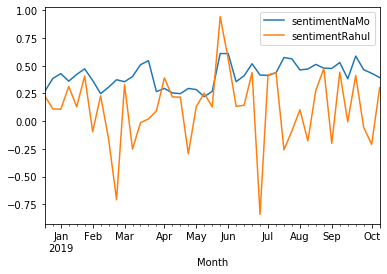

In [24]:
# getting Rahul sentiment data into pandas dataframe
seriesR = pd.DataFrame(lSentimentR, columns=['date', 'sentiment'])
seriesR = seriesR[seriesR['date'] > '2018-11-01']
# using date column as index
seriesR.set_index('date', inplace=True)
#setting numeric datatype of sentiment column
seriesR[['sentiment']] = seriesR[['sentiment']].apply(pd.to_numeric)

#create time series data by adding up sentiment scores
newSeriesR = seriesR.resample('1W', how='mean')


# getting data into pandas dataframe
seriesNM = pd.DataFrame(lSentiment, columns=['date', 'sentimentNaMo'])

# using date column as index
seriesNM.set_index('date', inplace=True)
#setting numeric datatype of sentiment column
seriesNM[['sentimentNaMo']] = seriesNM[['sentimentNaMo']].apply(pd.to_numeric)

#create time series data by adding up sentiment scores
newSeriesNM = seriesNM.resample('1W', how='mean')

newSeriesNM['sentimentRahul'] = newSeriesR['sentiment']

# plots time series data
newSeriesNM.plot()
plt.xlabel('Month')
plt.show()
